In [1]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# %%
path = './dataset/' 
train = pd.read_csv(path + 'sign_mnist_train.csv')
test =  pd.read_csv(path + 'sign_mnist_test.csv')


print(len(train))


27455


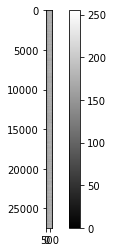

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         107     118     127     134     139     143     146     150     153   
1         155     157     156     156     156     157     156     158     158   
2         187     188     188     187     187     186     187     188     187   
3         211     211     212     212     211     210     211     210     210   
4         164     167     170     172     176     179     180     184     185   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     189     189     190     190     192     193     193     193     193   
27451     151     154     157     158     160     161     163     164     166   
27452     174     174     174     174     174     175     175     174     173   
27453     177     181     184     185     187     189     190     191     191   
27454     179     180     180     180     182     181     182     183     182   

       pixel10  ...  pixel7

In [3]:
# %%
plt.imshow(train.iloc[:, 1:], cmap='gray')
plt.colorbar()
plt.show() 
print(train.iloc[:, 1:])

# print(train.head())
# print('----------------------')
# print(test.head())
# print('----------------------')
# print(len(train), '  ', len(test))



In [4]:
# %% 
train_X = train.iloc[:, 1:].values
train_Y = train.iloc[:, 0].values
test_X = test.iloc[:, 1:].values
test_Y = test.iloc[:, 0].values

print('Before')
print(train_X.shape)
print(train_Y.shape)

train_X = train_X.reshape(-1, 28, 28) 
# test_Y = test_Y.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28)

print('After') 
print(train_X.shape)
print(test_X.shape)


Before
(27455, 784)
(27455,)
After
(27455, 28, 28)
(7172, 28, 28)


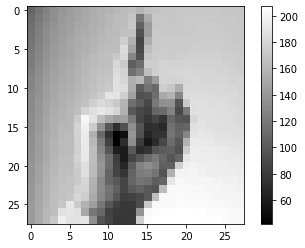

3


In [5]:
# %% 
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show() 
print(train_Y[0])

In [6]:
# %%
train_X = train_X / 255.0 
test_X = test_X / 255.0 

print(train_X)
print(test_X)


[[[0.41960784 0.4627451  0.49803922 ... 0.66666667 0.66666667 0.6627451 ]
  [0.43529412 0.4745098  0.50588235 ... 0.67058824 0.67058824 0.66666667]
  [0.44313725 0.48235294 0.51372549 ... 0.67058824 0.67058824 0.67058824]
  ...
  [0.55686275 0.58823529 0.62352941 ... 0.79215686 0.78823529 0.78431373]
  [0.55686275 0.59215686 0.62745098 ... 0.8        0.79607843 0.79215686]
  [0.55686275 0.59215686 0.62745098 ... 0.8        0.79607843 0.79215686]]

 [[0.60784314 0.61568627 0.61176471 ... 0.54117647 0.36078431 0.42352941]
  [0.61960784 0.62352941 0.62352941 ... 0.55686275 0.45490196 0.56078431]
  [0.63137255 0.63137255 0.63137255 ... 0.57647059 0.49019608 0.54901961]
  ...
  [0.63529412 0.62352941 0.56862745 ... 0.35686275 0.39607843 0.36862745]
  [0.6        0.54509804 0.45098039 ... 0.38039216 0.37254902 0.47058824]
  [0.52941176 0.45490196 0.37254902 ... 0.40392157 0.52941176 0.58431373]]

 [[0.73333333 0.7372549  0.7372549  ... 0.25882353 0.30196078 0.3254902 ]
  [0.7372549  0.741176

In [ ]:
# %% 
# One-hot 
train_X = tf.keras.utils.to_categorical(train_Y, num_classes=26)
test_X = tf.keras.utils.to_categorical(test_Y, num_classes=26)


print(train_X)
print(test_X)



In [7]:
# %% 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 103,834
Trainable params: 103,834
Non-trainable params: 0
_________________________________________________________________


In [8]:
# %%
print(train_X.shape)
print(train_Y.shape)

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)



(27455, 28, 28)
(27455,)


Epoch 1/25


  1/644 [..............................] - ETA: 0s - loss: 3.5698 - accuracy: 0.0312

 75/644 [==>...........................] - ETA: 0s - loss: 3.1578 - accuracy: 0.0717

153/644 [======>.......................] - ETA: 0s - loss: 3.0161 - accuracy: 0.1179

231/644 [=========>....................] - ETA: 0s - loss: 2.8783 - accuracy: 0.1690

309/644 [=============>................] - ETA: 0s - loss: 2.7552 - accuracy: 0.2082

388/644 [=================>............] - ETA: 0s - loss: 2.6423 - accuracy: 0.2413



462/644 [====================>.........] - ETA: 0s - loss: 2.5408 - accuracy: 0.2709



538/644 [========================>.....] - ETA: 0s - loss: 2.4469 - accuracy: 0.2980

614/644 [===========================>..] - ETA: 0s - loss: 2.3648 - accuracy: 0.3218

644/644 [==============================] - 1s 978us/step - loss: 2.3338 - accuracy: 0.3307 - val_loss: 1.6462 - val_accuracy: 0.5557


Epoch 2/25
  1/644 [..............................] - ETA: 0s - loss: 1.7950 - accuracy: 0.5000

 77/644 [==>...........................] - ETA: 0s - loss: 1.6183 - accuracy: 0.5483

154/644 [======>.......................] - ETA: 0s - loss: 1.5790 - accuracy: 0.5550

229/644 [=========>....................] - ETA: 0s - loss: 1.5530 - accuracy: 0.5614



305/644 [=============>................] - ETA: 0s - loss: 1.5283 - accuracy: 0.5653



382/644 [================>.............] - ETA: 0s - loss: 1.5038 - accuracy: 0.5679



457/644 [====================>.........] - ETA: 0s - loss: 1.4810 - accuracy: 0.5723



531/644 [=======================>......] - ETA: 0s - loss: 1.4610 - accuracy: 0.5754

607/644 [===========================>..] - ETA: 0s - loss: 1.4406 - accuracy: 0.5826

644/644 [==============================] - 1s 807us/step - loss: 1.4269 - accuracy: 0.5866 - val_loss: 1.2624 - val_accuracy: 0.6483


Epoch 3/25
  1/644 [..............................] - ETA: 0s - loss: 0.9493 - accuracy: 0.7500

 78/644 [==>...........................] - ETA: 0s - loss: 1.2558 - accuracy: 0.6194

155/644 [======>.......................] - ETA: 0s - loss: 1.2196 - accuracy: 0.6367

230/644 [=========>....................] - ETA: 0s - loss: 1.1937 - accuracy: 0.6432



305/644 [=============>................] - ETA: 0s - loss: 1.1768 - accuracy: 0.6496



382/644 [================>.............] - ETA: 0s - loss: 1.1660 - accuracy: 0.6520



457/644 [====================>.........] - ETA: 0s - loss: 1.1544 - accuracy: 0.6560

531/644 [=======================>......] - ETA: 0s - loss: 1.1394 - accuracy: 0.6603



608/644 [===========================>..] - ETA: 0s - loss: 1.1236 - accuracy: 0.6665

644/644 [==============================] - 1s 803us/step - loss: 1.1194 - accuracy: 0.6673 - val_loss: 0.9928 - val_accuracy: 0.7348


Epoch 4/25
  1/644 [..............................] - ETA: 0s - loss: 1.1467 - accuracy: 0.5938

 78/644 [==>...........................] - ETA: 0s - loss: 0.9783 - accuracy: 0.7131

156/644 [======>.......................] - ETA: 0s - loss: 0.9951 - accuracy: 0.7053

232/644 [=========>....................] - ETA: 0s - loss: 0.9739 - accuracy: 0.7115



306/644 [=============>................] - ETA: 0s - loss: 0.9683 - accuracy: 0.7137

379/644 [================>.............] - ETA: 0s - loss: 0.9636 - accuracy: 0.7157

455/644 [====================>.........] - ETA: 0s - loss: 0.9491 - accuracy: 0.7190



533/644 [=======================>......] - ETA: 0s - loss: 0.9349 - accuracy: 0.7255



608/644 [===========================>..] - ETA: 0s - loss: 0.9274 - accuracy: 0.7259

644/644 [==============================] - 1s 804us/step - loss: 0.9257 - accuracy: 0.7264 - val_loss: 0.8883 - val_accuracy: 0.7219


Epoch 5/25
  1/644 [..............................] - ETA: 0s - loss: 0.7868 - accuracy: 0.7812

 76/644 [==>...........................] - ETA: 0s - loss: 0.8312 - accuracy: 0.7500



154/644 [======>.......................] - ETA: 0s - loss: 0.8251 - accuracy: 0.7563

227/644 [=========>....................] - ETA: 0s - loss: 0.8275 - accuracy: 0.7563



304/644 [=============>................] - ETA: 0s - loss: 0.8208 - accuracy: 0.7566

380/644 [================>.............] - ETA: 0s - loss: 0.8172 - accuracy: 0.7613



458/644 [====================>.........] - ETA: 0s - loss: 0.8096 - accuracy: 0.7643



533/644 [=======================>......] - ETA: 0s - loss: 0.7998 - accuracy: 0.7675



608/644 [===========================>..] - ETA: 0s - loss: 0.8006 - accuracy: 0.7680



644/644 [==============================] - 1s 804us/step - loss: 0.7954 - accuracy: 0.7694 - val_loss: 0.7478 - val_accuracy: 0.7866


Epoch 6/25
  1/644 [..............................] - ETA: 0s - loss: 0.5997 - accuracy: 0.8438

 76/644 [==>...........................] - ETA: 0s - loss: 0.7257 - accuracy: 0.7804

151/644 [======>.......................] - ETA: 0s - loss: 0.7308 - accuracy: 0.7852

228/644 [=========>....................] - ETA: 0s - loss: 0.7228 - accuracy: 0.7877



305/644 [=============>................] - ETA: 0s - loss: 0.7245 - accuracy: 0.7871

382/644 [================>.............] - ETA: 0s - loss: 0.7145 - accuracy: 0.7907



458/644 [====================>.........] - ETA: 0s - loss: 0.7113 - accuracy: 0.7915



533/644 [=======================>......] - ETA: 0s - loss: 0.7031 - accuracy: 0.7956



610/644 [===========================>..] - ETA: 0s - loss: 0.6992 - accuracy: 0.7971

644/644 [==============================] - 1s 804us/step - loss: 0.6978 - accuracy: 0.7972 - val_loss: 0.6516 - val_accuracy: 0.7988


Epoch 7/25
  1/644 [..............................] - ETA: 0s - loss: 0.4093 - accuracy: 0.9375

 79/644 [==>...........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.8105



156/644 [======>.......................] - ETA: 0s - loss: 0.6454 - accuracy: 0.8171

231/644 [=========>....................] - ETA: 0s - loss: 0.6427 - accuracy: 0.8179



309/644 [=============>................] - ETA: 0s - loss: 0.6365 - accuracy: 0.8164



386/644 [================>.............] - ETA: 0s - loss: 0.6314 - accuracy: 0.8177



462/644 [====================>.........] - ETA: 0s - loss: 0.6232 - accuracy: 0.8206



540/644 [========================>.....] - ETA: 0s - loss: 0.6202 - accuracy: 0.8216

617/644 [===========================>..] - ETA: 0s - loss: 0.6186 - accuracy: 0.8226

644/644 [==============================] - 1s 796us/step - loss: 0.6181 - accuracy: 0.8229 - val_loss: 0.6437 - val_accuracy: 0.8041


Epoch 8/25
  1/644 [..............................] - ETA: 0s - loss: 0.4519 - accuracy: 0.8750



 75/644 [==>...........................] - ETA: 0s - loss: 0.5886 - accuracy: 0.8267



152/644 [======>.......................] - ETA: 0s - loss: 0.5748 - accuracy: 0.8287

227/644 [=========>....................] - ETA: 0s - loss: 0.5726 - accuracy: 0.8290



304/644 [=============>................] - ETA: 0s - loss: 0.5607 - accuracy: 0.8377



377/644 [================>.............] - ETA: 0s - loss: 0.5547 - accuracy: 0.8390



451/644 [====================>.........] - ETA: 0s - loss: 0.5525 - accuracy: 0.8415



524/644 [=======================>......] - ETA: 0s - loss: 0.5464 - accuracy: 0.8446

598/644 [==========================>...] - ETA: 0s - loss: 0.5491 - accuracy: 0.8431

644/644 [==============================] - 1s 815us/step - loss: 0.5461 - accuracy: 0.8431 - val_loss: 0.4772 - val_accuracy: 0.8775


Epoch 9/25
  1/644 [..............................] - ETA: 0s - loss: 0.5917 - accuracy: 0.8125

 76/644 [==>...........................] - ETA: 0s - loss: 0.4942 - accuracy: 0.8627

155/644 [======>.......................] - ETA: 0s - loss: 0.4763 - accuracy: 0.8710

233/644 [=========>....................] - ETA: 0s - loss: 0.4833 - accuracy: 0.8676



308/644 [=============>................] - ETA: 0s - loss: 0.4854 - accuracy: 0.8663

383/644 [================>.............] - ETA: 0s - loss: 0.4851 - accuracy: 0.8665



460/644 [====================>.........] - ETA: 0s - loss: 0.4860 - accuracy: 0.8661



537/644 [========================>.....] - ETA: 0s - loss: 0.4849 - accuracy: 0.8660



611/644 [===========================>..] - ETA: 0s - loss: 0.4824 - accuracy: 0.8660

644/644 [==============================] - 1s 800us/step - loss: 0.4839 - accuracy: 0.8658 - val_loss: 0.4463 - val_accuracy: 0.8760


Epoch 10/25
  1/644 [..............................] - ETA: 0s - loss: 0.4765 - accuracy: 0.8750

 78/644 [==>...........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.8762

154/644 [======>.......................] - ETA: 0s - loss: 0.4467 - accuracy: 0.8778

232/644 [=========>....................] - ETA: 0s - loss: 0.4509 - accuracy: 0.8753



308/644 [=============>................] - ETA: 0s - loss: 0.4460 - accuracy: 0.8771



385/644 [================>.............] - ETA: 0s - loss: 0.4406 - accuracy: 0.8796



460/644 [====================>.........] - ETA: 0s - loss: 0.4388 - accuracy: 0.8802



536/644 [=======================>......] - ETA: 0s - loss: 0.4370 - accuracy: 0.8807

612/644 [===========================>..] - ETA: 0s - loss: 0.4298 - accuracy: 0.8830

644/644 [==============================] - 1s 807us/step - loss: 0.4293 - accuracy: 0.8827 - val_loss: 0.3907 - val_accuracy: 0.8926


Epoch 11/25
  1/644 [..............................] - ETA: 0s - loss: 0.5546 - accuracy: 0.9062



 78/644 [==>...........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.8934

155/644 [======>.......................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8978

232/644 [=========>....................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8936



307/644 [=============>................] - ETA: 0s - loss: 0.4066 - accuracy: 0.8887



385/644 [================>.............] - ETA: 0s - loss: 0.4076 - accuracy: 0.8869



459/644 [====================>.........] - ETA: 0s - loss: 0.4045 - accuracy: 0.8876



535/644 [=======================>......] - ETA: 0s - loss: 0.3999 - accuracy: 0.8887



613/644 [===========================>..] - ETA: 0s - loss: 0.3921 - accuracy: 0.8915

644/644 [==============================] - 1s 801us/step - loss: 0.3909 - accuracy: 0.8923 - val_loss: 0.3597 - val_accuracy: 0.9015


Epoch 12/25
  1/644 [..............................] - ETA: 0s - loss: 0.4035 - accuracy: 0.9375



 76/644 [==>...........................] - ETA: 0s - loss: 0.3621 - accuracy: 0.9062

151/644 [======>.......................] - ETA: 0s - loss: 0.3567 - accuracy: 0.9110

228/644 [=========>....................] - ETA: 0s - loss: 0.3604 - accuracy: 0.9075

306/644 [=============>................] - ETA: 0s - loss: 0.3578 - accuracy: 0.9087



384/644 [================>.............] - ETA: 0s - loss: 0.3535 - accuracy: 0.9092



457/644 [====================>.........] - ETA: 0s - loss: 0.3520 - accuracy: 0.9086



533/644 [=======================>......] - ETA: 0s - loss: 0.3504 - accuracy: 0.9085



610/644 [===========================>..] - ETA: 0s - loss: 0.3468 - accuracy: 0.9090

644/644 [==============================] - 1s 807us/step - loss: 0.3456 - accuracy: 0.9094 - val_loss: 0.2874 - val_accuracy: 0.9347


Epoch 13/25
  1/644 [..............................] - ETA: 0s - loss: 0.2189 - accuracy: 1.0000

 78/644 [==>...........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.9251

154/644 [======>.......................] - ETA: 0s - loss: 0.3233 - accuracy: 0.9150

230/644 [=========>....................] - ETA: 0s - loss: 0.3282 - accuracy: 0.9103



307/644 [=============>................] - ETA: 0s - loss: 0.3236 - accuracy: 0.9121



383/644 [================>.............] - ETA: 0s - loss: 0.3218 - accuracy: 0.9133



459/644 [====================>.........] - ETA: 0s - loss: 0.3182 - accuracy: 0.9138



535/644 [=======================>......] - ETA: 0s - loss: 0.3132 - accuracy: 0.9156



611/644 [===========================>..] - ETA: 0s - loss: 0.3107 - accuracy: 0.9170

644/644 [==============================] - 1s 806us/step - loss: 0.3080 - accuracy: 0.9184 - val_loss: 0.2824 - val_accuracy: 0.9331


Epoch 14/25
  1/644 [..............................] - ETA: 0s - loss: 0.1906 - accuracy: 1.0000

 78/644 [==>...........................] - ETA: 0s - loss: 0.2850 - accuracy: 0.9211

155/644 [======>.......................] - ETA: 0s - loss: 0.2826 - accuracy: 0.9254

232/644 [=========>....................] - ETA: 0s - loss: 0.2761 - accuracy: 0.9300



310/644 [=============>................] - ETA: 0s - loss: 0.2749 - accuracy: 0.9284



385/644 [================>.............] - ETA: 0s - loss: 0.2751 - accuracy: 0.9284



463/644 [====================>.........] - ETA: 0s - loss: 0.2715 - accuracy: 0.9299

538/644 [========================>.....] - ETA: 0s - loss: 0.2684 - accuracy: 0.9312



616/644 [===========================>..] - ETA: 0s - loss: 0.2666 - accuracy: 0.9321

644/644 [==============================] - 1s 798us/step - loss: 0.2653 - accuracy: 0.9325 - val_loss: 0.2845 - val_accuracy: 0.9136


Epoch 15/25
  1/644 [..............................] - ETA: 0s - loss: 0.2662 - accuracy: 0.9375



 77/644 [==>...........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.9225

152/644 [======>.......................] - ETA: 0s - loss: 0.2543 - accuracy: 0.9338

230/644 [=========>....................] - ETA: 0s - loss: 0.2488 - accuracy: 0.9368



308/644 [=============>................] - ETA: 0s - loss: 0.2491 - accuracy: 0.9368



386/644 [================>.............] - ETA: 0s - loss: 0.2448 - accuracy: 0.9387



462/644 [====================>.........] - ETA: 0s - loss: 0.2420 - accuracy: 0.9395

540/644 [========================>.....] - ETA: 0s - loss: 0.2433 - accuracy: 0.9387



619/644 [===========================>..] - ETA: 0s - loss: 0.2425 - accuracy: 0.9387

644/644 [==============================] - 1s 792us/step - loss: 0.2438 - accuracy: 0.9378 - val_loss: 0.2408 - val_accuracy: 0.9375


Epoch 16/25
  1/644 [..............................] - ETA: 0s - loss: 0.1227 - accuracy: 1.0000



 78/644 [==>...........................] - ETA: 0s - loss: 0.2334 - accuracy: 0.9391



157/644 [======>.......................] - ETA: 0s - loss: 0.2275 - accuracy: 0.9445

234/644 [=========>....................] - ETA: 0s - loss: 0.2312 - accuracy: 0.9432



311/644 [=============>................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9454



387/644 [=================>............] - ETA: 0s - loss: 0.2264 - accuracy: 0.9439



464/644 [====================>.........] - ETA: 0s - loss: 0.2263 - accuracy: 0.9435

540/644 [========================>.....] - ETA: 0s - loss: 0.2248 - accuracy: 0.9444



617/644 [===========================>..] - ETA: 0s - loss: 0.2217 - accuracy: 0.9453

644/644 [==============================] - 1s 793us/step - loss: 0.2203 - accuracy: 0.9456 - val_loss: 0.2061 - val_accuracy: 0.9547


Epoch 17/25
  1/644 [..............................] - ETA: 0s - loss: 0.1296 - accuracy: 0.9688



 80/644 [==>...........................] - ETA: 0s - loss: 0.1897 - accuracy: 0.9570



156/644 [======>.......................] - ETA: 0s - loss: 0.1914 - accuracy: 0.9567

235/644 [=========>....................] - ETA: 0s - loss: 0.1898 - accuracy: 0.9566



311/644 [=============>................] - ETA: 0s - loss: 0.1898 - accuracy: 0.9569



389/644 [=================>............] - ETA: 0s - loss: 0.1871 - accuracy: 0.9577



467/644 [====================>.........] - ETA: 0s - loss: 0.1863 - accuracy: 0.9580



544/644 [========================>.....] - ETA: 0s - loss: 0.1889 - accuracy: 0.9574



620/644 [===========================>..] - ETA: 0s - loss: 0.1888 - accuracy: 0.9576

644/644 [==============================] - 1s 795us/step - loss: 0.1905 - accuracy: 0.9567 - val_loss: 0.1994 - val_accuracy: 0.9493


Epoch 18/25
  1/644 [..............................] - ETA: 0s - loss: 0.1882 - accuracy: 0.9688



 79/644 [==>...........................] - ETA: 0s - loss: 0.1607 - accuracy: 0.9688



155/644 [======>.......................] - ETA: 0s - loss: 0.1666 - accuracy: 0.9655

232/644 [=========>....................] - ETA: 0s - loss: 0.1689 - accuracy: 0.9646

307/644 [=============>................] - ETA: 0s - loss: 0.1674 - accuracy: 0.9656



383/644 [================>.............] - ETA: 0s - loss: 0.1657 - accuracy: 0.9661



460/644 [====================>.........] - ETA: 0s - loss: 0.1683 - accuracy: 0.9647



535/644 [=======================>......] - ETA: 0s - loss: 0.1701 - accuracy: 0.9637

609/644 [===========================>..] - ETA: 0s - loss: 0.1691 - accuracy: 0.9637

644/644 [==============================] - 1s 807us/step - loss: 0.1704 - accuracy: 0.9628 - val_loss: 0.2550 - val_accuracy: 0.9149


Epoch 19/25
  1/644 [..............................] - ETA: 0s - loss: 0.2502 - accuracy: 0.8750



 75/644 [==>...........................] - ETA: 0s - loss: 0.1735 - accuracy: 0.9529

150/644 [=====>........................] - ETA: 0s - loss: 0.1734 - accuracy: 0.9577

226/644 [=========>....................] - ETA: 0s - loss: 0.1660 - accuracy: 0.9599

304/644 [=============>................] - ETA: 0s - loss: 0.1681 - accuracy: 0.9592



381/644 [================>.............] - ETA: 0s - loss: 0.1647 - accuracy: 0.9607



458/644 [====================>.........] - ETA: 0s - loss: 0.1623 - accuracy: 0.9618



533/644 [=======================>......] - ETA: 0s - loss: 0.1597 - accuracy: 0.9633



609/644 [===========================>..] - ETA: 0s - loss: 0.1570 - accuracy: 0.9645

644/644 [==============================] - 1s 809us/step - loss: 0.1556 - accuracy: 0.9651 - val_loss: 0.1669 - val_accuracy: 0.9573


Epoch 20/25
  1/644 [..............................] - ETA: 0s - loss: 0.1784 - accuracy: 0.9375

 76/644 [==>...........................] - ETA: 0s - loss: 0.1416 - accuracy: 0.9667

154/644 [======>.......................] - ETA: 0s - loss: 0.1354 - accuracy: 0.9728

230/644 [=========>....................] - ETA: 0s - loss: 0.1381 - accuracy: 0.9720



306/644 [=============>................] - ETA: 0s - loss: 0.1355 - accuracy: 0.9728



382/644 [================>.............] - ETA: 0s - loss: 0.1366 - accuracy: 0.9725

457/644 [====================>.........] - ETA: 0s - loss: 0.1357 - accuracy: 0.9729



534/644 [=======================>......] - ETA: 0s - loss: 0.1323 - accuracy: 0.9745



607/644 [===========================>..] - ETA: 0s - loss: 0.1307 - accuracy: 0.9747

644/644 [==============================] - 1s 811us/step - loss: 0.1306 - accuracy: 0.9749 - val_loss: 0.1151 - val_accuracy: 0.9838


Epoch 21/25
  1/644 [..............................] - ETA: 0s - loss: 0.1266 - accuracy: 0.9688

 76/644 [==>...........................] - ETA: 0s - loss: 0.1246 - accuracy: 0.9762

149/644 [=====>........................] - ETA: 0s - loss: 0.1210 - accuracy: 0.9776

225/644 [=========>....................] - ETA: 0s - loss: 0.1202 - accuracy: 0.9785



302/644 [=============>................] - ETA: 0s - loss: 0.1208 - accuracy: 0.9784



379/644 [================>.............] - ETA: 0s - loss: 0.1195 - accuracy: 0.9795

452/644 [====================>.........] - ETA: 0s - loss: 0.1190 - accuracy: 0.9793



529/644 [=======================>......] - ETA: 0s - loss: 0.1166 - accuracy: 0.9802



606/644 [===========================>..] - ETA: 0s - loss: 0.1157 - accuracy: 0.9803

644/644 [==============================] - 1s 812us/step - loss: 0.1156 - accuracy: 0.9806 - val_loss: 0.1396 - val_accuracy: 0.9618


Epoch 22/25
  1/644 [..............................] - ETA: 0s - loss: 0.0869 - accuracy: 1.0000

 78/644 [==>...........................] - ETA: 0s - loss: 0.1320 - accuracy: 0.9704

155/644 [======>.......................] - ETA: 0s - loss: 0.1201 - accuracy: 0.9738

230/644 [=========>....................] - ETA: 0s - loss: 0.1185 - accuracy: 0.9758



307/644 [=============>................] - ETA: 0s - loss: 0.1159 - accuracy: 0.9771



384/644 [================>.............] - ETA: 0s - loss: 0.1173 - accuracy: 0.9770



458/644 [====================>.........] - ETA: 0s - loss: 0.1155 - accuracy: 0.9779

534/644 [=======================>......] - ETA: 0s - loss: 0.1123 - accuracy: 0.9788



609/644 [===========================>..] - ETA: 0s - loss: 0.1113 - accuracy: 0.9790



644/644 [==============================] - 1s 806us/step - loss: 0.1103 - accuracy: 0.9794 - val_loss: 0.1108 - val_accuracy: 0.9781


Epoch 23/25
  1/644 [..............................] - ETA: 0s - loss: 0.1192 - accuracy: 0.9375

 77/644 [==>...........................] - ETA: 0s - loss: 0.0918 - accuracy: 0.9878

154/644 [======>.......................] - ETA: 0s - loss: 0.0945 - accuracy: 0.9856

230/644 [=========>....................] - ETA: 0s - loss: 0.1047 - accuracy: 0.9811



306/644 [=============>................] - ETA: 0s - loss: 0.1003 - accuracy: 0.9838



382/644 [================>.............] - ETA: 0s - loss: 0.0969 - accuracy: 0.9841

458/644 [====================>.........] - ETA: 0s - loss: 0.0971 - accuracy: 0.9844



534/644 [=======================>......] - ETA: 0s - loss: 0.0974 - accuracy: 0.9837



607/644 [===========================>..] - ETA: 0s - loss: 0.0948 - accuracy: 0.9845

644/644 [==============================] - 1s 820us/step - loss: 0.0963 - accuracy: 0.9840 - val_loss: 0.0921 - val_accuracy: 0.9846


Epoch 24/25
  1/644 [..............................] - ETA: 0s - loss: 0.0982 - accuracy: 0.9688



 69/644 [==>...........................] - ETA: 0s - loss: 0.0966 - accuracy: 0.9787

117/644 [====>.........................] - ETA: 0s - loss: 0.0953 - accuracy: 0.9808

174/644 [=======>......................] - ETA: 0s - loss: 0.0875 - accuracy: 0.9853



248/644 [==========>...................] - ETA: 0s - loss: 0.0842 - accuracy: 0.9871



323/644 [==============>...............] - ETA: 0s - loss: 0.0896 - accuracy: 0.9843

392/644 [=================>............] - ETA: 0s - loss: 0.0889 - accuracy: 0.9849



466/644 [====================>.........] - ETA: 0s - loss: 0.0884 - accuracy: 0.9848



540/644 [========================>.....] - ETA: 0s - loss: 0.0854 - accuracy: 0.9863



615/644 [===========================>..] - ETA: 0s - loss: 0.0861 - accuracy: 0.9859

644/644 [==============================] - 1s 885us/step - loss: 0.0864 - accuracy: 0.9858 - val_loss: 0.1145 - val_accuracy: 0.9685


Epoch 25/25
  1/644 [..............................] - ETA: 0s - loss: 0.1173 - accuracy: 0.9688

 76/644 [==>...........................] - ETA: 0s - loss: 0.0772 - accuracy: 0.9881



151/644 [======>.......................] - ETA: 0s - loss: 0.0918 - accuracy: 0.9797

227/644 [=========>....................] - ETA: 0s - loss: 0.0874 - accuracy: 0.9820

303/644 [=============>................] - ETA: 0s - loss: 0.0832 - accuracy: 0.9832



379/644 [================>.............] - ETA: 0s - loss: 0.0812 - accuracy: 0.9842



452/644 [====================>.........] - ETA: 0s - loss: 0.0807 - accuracy: 0.9851



526/644 [=======================>......] - ETA: 0s - loss: 0.0784 - accuracy: 0.9865

601/644 [==========================>...] - ETA: 0s - loss: 0.0779 - accuracy: 0.9868

644/644 [==============================] - 1s 944us/step - loss: 0.0781 - accuracy: 0.9868 - val_loss: 0.0622 - val_accuracy: 0.9955


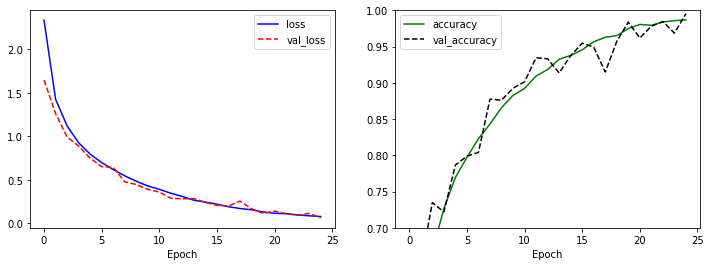

In [11]:
# %%
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib inline

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')

plt.xlabel('Epoch')
plt.legend() 

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend() 

plt.show()



In [12]:
# %% 
# ------------------------------------------------------------------
# CNN 처리
train_X = train.iloc[:, 1:].values
train_Y = train.iloc[:, 0].values

test_X = test.iloc[:, 1:].values
test_Y = test.iloc[:, 0].values

print('Before')
print(train_X.shape)
print(train_Y.shape)

train_X = train_X.reshape(-1, 28, 28, 1) 
test_X = test_X.reshape(-1, 28, 28, 1)

print('After') 
print(train_X.shape)
print(test_X.shape)



Before
(27455, 784)
(27455,)
After
(27455, 28, 28, 1)
(7172, 28, 28, 1)


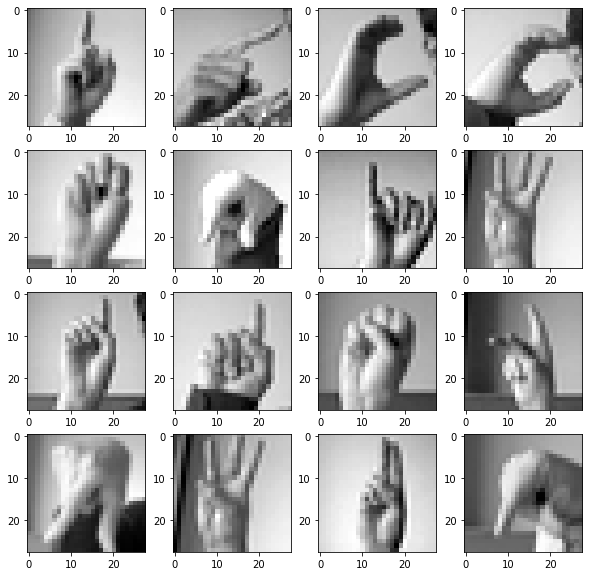

[ 3  6  2  2 13 16  8 22  3  3 18 10 16 22 20 16 17 13 13 19 18 21 16 23
  3]


In [13]:
# %%
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10)) 

for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap='gray')

plt.show() 

print(train_Y[:25])



In [14]:
# %% 
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16),
#     tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
#     tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dense(units=26, activation='softmax')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               410112    
_________________________________________________________________
dense_3 (Dense)              (None, 26)               

Epoch 1/10


  1/644 [..............................] - ETA: 0s - loss: 68.4899 - accuracy: 0.0312

  7/644 [..............................] - ETA: 4s - loss: 65.8870 - accuracy: 0.0446

 13/644 [..............................] - ETA: 4s - loss: 50.7384 - accuracy: 0.0505

 19/644 [..............................] - ETA: 5s - loss: 40.7512 - accuracy: 0.0773

 25/644 [>.............................] - ETA: 5s - loss: 33.5903 - accuracy: 0.0988

 31/644 [>.............................] - ETA: 5s - loss: 28.5180 - accuracy: 0.1240



 38/644 [>.............................] - ETA: 5s - loss: 24.1385 - accuracy: 0.1562

 44/644 [=>............................] - ETA: 5s - loss: 21.2820 - accuracy: 0.1925



 51/644 [=>............................] - ETA: 4s - loss: 18.6728 - accuracy: 0.2365

 58/644 [=>............................] - ETA: 4s - loss: 16.6808 - accuracy: 0.2683

 64/644 [=>............................] - ETA: 4s - loss: 15.2822 - accuracy: 0.2998

 71/644 [==>...........................] - ETA: 4s - loss: 13.9592 - accuracy: 0.3270

 77/644 [==>...........................] - ETA: 4s - loss: 12.9706 - accuracy: 0.3511

 83/644 [==>...........................] - ETA: 4s - loss: 12.1161 - accuracy: 0.3761

 89/644 [===>..........................] - ETA: 4s - loss: 11.3651 - accuracy: 0.3999

 95/644 [===>..........................] - ETA: 4s - loss: 10.7085 - accuracy: 0.4194

101/644 [===>..........................] - ETA: 4s - loss: 10.1280 - accuracy: 0.4372

107/644 [===>..........................] - ETA: 4s - loss: 9.5954 - accuracy: 0.4594 

113/644 [====>.........................] - ETA: 4s - loss: 9.1226 - accuracy: 0.4773

119/644 [====>.........................] - ETA: 4s - loss: 8.6997 - accuracy: 0.4934

125/644 [====>.........................] - ETA: 4s - loss: 8.3123 - accuracy: 0.5080

131/644 [=====>........................] - ETA: 4s - loss: 7.9544 - accuracy: 0.5229

137/644 [=====>........................] - ETA: 4s - loss: 7.6354 - accuracy: 0.5356

143/644 [=====>........................] - ETA: 4s - loss: 7.3417 - accuracy: 0.5485



149/644 [=====>........................] - ETA: 4s - loss: 7.0620 - accuracy: 0.5623

155/644 [======>.......................] - ETA: 4s - loss: 6.8021 - accuracy: 0.5750

161/644 [======>.......................] - ETA: 4s - loss: 6.5735 - accuracy: 0.5852



168/644 [======>.......................] - ETA: 4s - loss: 6.3270 - accuracy: 0.5945

175/644 [=======>......................] - ETA: 4s - loss: 6.0893 - accuracy: 0.6057



181/644 [=======>......................] - ETA: 4s - loss: 5.8996 - accuracy: 0.6140

187/644 [=======>......................] - ETA: 3s - loss: 5.7204 - accuracy: 0.6232

193/644 [=======>......................] - ETA: 3s - loss: 5.5482 - accuracy: 0.6328

199/644 [========>.....................] - ETA: 3s - loss: 5.3904 - accuracy: 0.6415

205/644 [========>.....................] - ETA: 3s - loss: 5.2402 - accuracy: 0.6498

211/644 [========>.....................] - ETA: 3s - loss: 5.0973 - accuracy: 0.6580

217/644 [=========>....................] - ETA: 3s - loss: 4.9669 - accuracy: 0.6653

223/644 [=========>....................] - ETA: 3s - loss: 4.8386 - accuracy: 0.6724

229/644 [=========>....................] - ETA: 3s - loss: 4.7162 - accuracy: 0.6793

235/644 [=========>....................] - ETA: 3s - loss: 4.5976 - accuracy: 0.6870

241/644 [==========>...................] - ETA: 3s - loss: 4.4864 - accuracy: 0.6941

247/644 [==========>...................] - ETA: 3s - loss: 4.3815 - accuracy: 0.7005



253/644 [==========>...................] - ETA: 3s - loss: 4.2803 - accuracy: 0.7064

259/644 [===========>..................] - ETA: 3s - loss: 4.1827 - accuracy: 0.7126



265/644 [===========>..................] - ETA: 3s - loss: 4.0899 - accuracy: 0.7185



271/644 [===========>..................] - ETA: 3s - loss: 4.0010 - accuracy: 0.7241

277/644 [===========>..................] - ETA: 3s - loss: 3.9159 - accuracy: 0.7295

284/644 [============>.................] - ETA: 3s - loss: 3.8213 - accuracy: 0.7356



290/644 [============>.................] - ETA: 3s - loss: 3.7444 - accuracy: 0.7404

296/644 [============>.................] - ETA: 3s - loss: 3.6697 - accuracy: 0.7454



302/644 [=============>................] - ETA: 3s - loss: 3.5985 - accuracy: 0.7498

308/644 [=============>................] - ETA: 2s - loss: 3.5290 - accuracy: 0.7546

314/644 [=============>................] - ETA: 2s - loss: 3.4635 - accuracy: 0.7587

320/644 [=============>................] - ETA: 2s - loss: 3.4003 - accuracy: 0.7626

326/644 [==============>...............] - ETA: 2s - loss: 3.3387 - accuracy: 0.7670



332/644 [==============>...............] - ETA: 2s - loss: 3.2789 - accuracy: 0.7712

338/644 [==============>...............] - ETA: 2s - loss: 3.2218 - accuracy: 0.7748

344/644 [===============>..............] - ETA: 2s - loss: 3.1678 - accuracy: 0.7781

350/644 [===============>..............] - ETA: 2s - loss: 3.1140 - accuracy: 0.7818

356/644 [===============>..............] - ETA: 2s - loss: 3.0624 - accuracy: 0.7850

362/644 [===============>..............] - ETA: 2s - loss: 3.0126 - accuracy: 0.7883

368/644 [================>.............] - ETA: 2s - loss: 2.9642 - accuracy: 0.7916



374/644 [================>.............] - ETA: 2s - loss: 2.9173 - accuracy: 0.7949



380/644 [================>.............] - ETA: 2s - loss: 2.8718 - accuracy: 0.7979

386/644 [================>.............] - ETA: 2s - loss: 2.8277 - accuracy: 0.8009

393/644 [=================>............] - ETA: 2s - loss: 2.7779 - accuracy: 0.8044

399/644 [=================>............] - ETA: 2s - loss: 2.7364 - accuracy: 0.8073

405/644 [=================>............] - ETA: 2s - loss: 2.6962 - accuracy: 0.8101



411/644 [==================>...........] - ETA: 2s - loss: 2.6573 - accuracy: 0.8128



417/644 [==================>...........] - ETA: 2s - loss: 2.6191 - accuracy: 0.8155

423/644 [==================>...........] - ETA: 1s - loss: 2.5825 - accuracy: 0.8180

429/644 [==================>...........] - ETA: 1s - loss: 2.5466 - accuracy: 0.8204

434/644 [===================>..........] - ETA: 1s - loss: 2.5177 - accuracy: 0.8224

440/644 [===================>..........] - ETA: 1s - loss: 2.4836 - accuracy: 0.8248

446/644 [===================>..........] - ETA: 1s - loss: 2.4505 - accuracy: 0.8271

452/644 [====================>.........] - ETA: 1s - loss: 2.4181 - accuracy: 0.8294

458/644 [====================>.........] - ETA: 1s - loss: 2.3866 - accuracy: 0.8317

464/644 [====================>.........] - ETA: 1s - loss: 2.3559 - accuracy: 0.8338

470/644 [====================>.........] - ETA: 1s - loss: 2.3260 - accuracy: 0.8359

476/644 [=====================>........] - ETA: 1s - loss: 2.2968 - accuracy: 0.8380

482/644 [=====================>........] - ETA: 1s - loss: 2.2684 - accuracy: 0.8399

488/644 [=====================>........] - ETA: 1s - loss: 2.2407 - accuracy: 0.8419



494/644 [======================>.......] - ETA: 1s - loss: 2.2135 - accuracy: 0.8438



500/644 [======================>.......] - ETA: 1s - loss: 2.1873 - accuracy: 0.8456

506/644 [======================>.......] - ETA: 1s - loss: 2.1614 - accuracy: 0.8475



512/644 [======================>.......] - ETA: 1s - loss: 2.1362 - accuracy: 0.8492



518/644 [=======================>......] - ETA: 1s - loss: 2.1115 - accuracy: 0.8510

524/644 [=======================>......] - ETA: 1s - loss: 2.0875 - accuracy: 0.8527



530/644 [=======================>......] - ETA: 1s - loss: 2.0639 - accuracy: 0.8544

535/644 [=======================>......] - ETA: 0s - loss: 2.0447 - accuracy: 0.8557

541/644 [========================>.....] - ETA: 0s - loss: 2.0221 - accuracy: 0.8573

547/644 [========================>.....] - ETA: 0s - loss: 2.0000 - accuracy: 0.8589



553/644 [========================>.....] - ETA: 0s - loss: 1.9783 - accuracy: 0.8604

559/644 [=========================>....] - ETA: 0s - loss: 1.9572 - accuracy: 0.8619

565/644 [=========================>....] - ETA: 0s - loss: 1.9365 - accuracy: 0.8634

570/644 [=========================>....] - ETA: 0s - loss: 1.9195 - accuracy: 0.8646

576/644 [=========================>....] - ETA: 0s - loss: 1.8996 - accuracy: 0.8660

582/644 [==========================>...] - ETA: 0s - loss: 1.8801 - accuracy: 0.8673



588/644 [==========================>...] - ETA: 0s - loss: 1.8609 - accuracy: 0.8687



594/644 [==========================>...] - ETA: 0s - loss: 1.8422 - accuracy: 0.8700

600/644 [==========================>...] - ETA: 0s - loss: 1.8238 - accuracy: 0.8713

606/644 [===========================>..] - ETA: 0s - loss: 1.8058 - accuracy: 0.8726

613/644 [===========================>..] - ETA: 0s - loss: 1.7853 - accuracy: 0.8740



620/644 [===========================>..] - ETA: 0s - loss: 1.7651 - accuracy: 0.8755

625/644 [============================>.] - ETA: 0s - loss: 1.7511 - accuracy: 0.8765

631/644 [============================>.] - ETA: 0s - loss: 1.7344 - accuracy: 0.8776

637/644 [============================>.] - ETA: 0s - loss: 1.7181 - accuracy: 0.8788

643/644 [============================>.] - ETA: 0s - loss: 1.7021 - accuracy: 0.8799

644/644 [==============================] - 6s 10ms/step - loss: 1.7009 - accuracy: 0.8800 - val_loss: 0.0032 - val_accuracy: 0.9999


Epoch 2/10
  1/644 [..............................] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

  7/644 [..............................] - ETA: 4s - loss: 0.0022 - accuracy: 1.0000

 14/644 [..............................] - ETA: 4s - loss: 0.0023 - accuracy: 1.0000

 20/644 [..............................] - ETA: 5s - loss: 0.0021 - accuracy: 1.0000

 26/644 [>.............................] - ETA: 5s - loss: 0.0026 - accuracy: 1.0000



 32/644 [>.............................] - ETA: 5s - loss: 0.0025 - accuracy: 1.0000

 38/644 [>.............................] - ETA: 5s - loss: 0.0024 - accuracy: 1.0000



 44/644 [=>............................] - ETA: 5s - loss: 0.0024 - accuracy: 1.0000

 50/644 [=>............................] - ETA: 5s - loss: 0.0023 - accuracy: 1.0000

 56/644 [=>............................] - ETA: 5s - loss: 0.0023 - accuracy: 1.0000

 62/644 [=>............................] - ETA: 5s - loss: 0.0022 - accuracy: 1.0000

 68/644 [==>...........................] - ETA: 5s - loss: 0.0022 - accuracy: 1.0000

 74/644 [==>...........................] - ETA: 5s - loss: 0.0021 - accuracy: 1.0000

 80/644 [==>...........................] - ETA: 5s - loss: 0.0021 - accuracy: 1.0000



 86/644 [===>..........................] - ETA: 4s - loss: 0.0021 - accuracy: 1.0000

 92/644 [===>..........................] - ETA: 4s - loss: 0.0021 - accuracy: 1.0000



 98/644 [===>..........................] - ETA: 4s - loss: 0.0021 - accuracy: 1.0000

104/644 [===>..........................] - ETA: 4s - loss: 0.0021 - accuracy: 1.0000

110/644 [====>.........................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

117/644 [====>.........................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

124/644 [====>.........................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000



130/644 [=====>........................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

136/644 [=====>........................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000



143/644 [=====>........................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

149/644 [=====>........................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000



155/644 [======>.......................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

161/644 [======>.......................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

167/644 [======>.......................] - ETA: 4s - loss: 0.0020 - accuracy: 1.0000

173/644 [=======>......................] - ETA: 4s - loss: 0.0019 - accuracy: 1.0000

179/644 [=======>......................] - ETA: 4s - loss: 0.0019 - accuracy: 1.0000

185/644 [=======>......................] - ETA: 4s - loss: 0.0019 - accuracy: 1.0000

191/644 [=======>......................] - ETA: 4s - loss: 0.0019 - accuracy: 1.0000

197/644 [========>.....................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

203/644 [========>.....................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000



209/644 [========>.....................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

215/644 [=========>....................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000



221/644 [=========>....................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000



227/644 [=========>....................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000



233/644 [=========>....................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000

239/644 [==========>...................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000



245/644 [==========>...................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000



251/644 [==========>...................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000

257/644 [==========>...................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000

263/644 [===========>..................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

269/644 [===========>..................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

275/644 [===========>..................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000

281/644 [============>.................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

287/644 [============>.................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

293/644 [============>.................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

299/644 [============>.................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

305/644 [=============>................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

311/644 [=============>................] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

317/644 [=============>................] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000



323/644 [==============>...............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000



329/644 [==============>...............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

335/644 [==============>...............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

341/644 [==============>...............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000



347/644 [===============>..............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

353/644 [===============>..............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

359/644 [===============>..............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000



365/644 [================>.............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

371/644 [================>.............] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

376/644 [================>.............] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

382/644 [================>.............] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

388/644 [=================>............] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

394/644 [=================>............] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

400/644 [=================>............] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

405/644 [=================>............] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

411/644 [==================>...........] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

417/644 [==================>...........] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000



423/644 [==================>...........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000



429/644 [==================>...........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

435/644 [===================>..........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000



441/644 [===================>..........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

447/644 [===================>..........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000



454/644 [====================>.........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

460/644 [====================>.........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

466/644 [====================>.........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000



472/644 [====================>.........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

478/644 [=====================>........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

484/644 [=====================>........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

490/644 [=====================>........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

496/644 [======================>.......] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

502/644 [======================>.......] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

508/644 [======================>.......] - ETA: 1s - loss: 0.0017 - accuracy: 1.0000

514/644 [======================>.......] - ETA: 1s - loss: 0.0017 - accuracy: 1.0000

520/644 [=======================>......] - ETA: 1s - loss: 0.0017 - accuracy: 1.0000

526/644 [=======================>......] - ETA: 1s - loss: 0.0017 - accuracy: 1.0000

532/644 [=======================>......] - ETA: 1s - loss: 0.0017 - accuracy: 1.0000



538/644 [========================>.....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

544/644 [========================>.....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000



550/644 [========================>.....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000



556/644 [========================>.....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

562/644 [=========================>....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000



568/644 [=========================>....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000



574/644 [=========================>....] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000



580/644 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

586/644 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000



592/644 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

598/644 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000



604/644 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

610/644 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

616/644 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

622/644 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

628/644 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

634/644 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

640/644 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

644/644 [==============================] - 6s 10ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 0.9999


Epoch 3/10
  1/644 [..............................] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

  6/644 [..............................] - ETA: 5s - loss: 0.0015 - accuracy: 1.0000

 12/644 [..............................] - ETA: 5s - loss: 0.0017 - accuracy: 1.0000

 18/644 [..............................] - ETA: 5s - loss: 0.0015 - accuracy: 1.0000

 24/644 [>.............................] - ETA: 5s - loss: 0.0014 - accuracy: 1.0000

 30/644 [>.............................] - ETA: 5s - loss: 0.0013 - accuracy: 1.0000



 36/644 [>.............................] - ETA: 5s - loss: 0.0012 - accuracy: 1.0000

 42/644 [>.............................] - ETA: 5s - loss: 0.0011 - accuracy: 1.0000

 48/644 [=>............................] - ETA: 5s - loss: 0.0011 - accuracy: 1.0000

 54/644 [=>............................] - ETA: 5s - loss: 0.0011 - accuracy: 1.0000

 60/644 [=>............................] - ETA: 5s - loss: 0.0010 - accuracy: 1.0000

 66/644 [==>...........................] - ETA: 5s - loss: 9.9610e-04 - accuracy: 1.0000

 72/644 [==>...........................] - ETA: 5s - loss: 9.4803e-04 - accuracy: 1.0000

 78/644 [==>...........................] - ETA: 5s - loss: 9.2597e-04 - accuracy: 1.0000



 84/644 [==>...........................] - ETA: 5s - loss: 9.0163e-04 - accuracy: 1.0000



 90/644 [===>..........................] - ETA: 5s - loss: 8.9433e-04 - accuracy: 1.0000

 96/644 [===>..........................] - ETA: 5s - loss: 8.7306e-04 - accuracy: 1.0000

102/644 [===>..........................] - ETA: 4s - loss: 8.6090e-04 - accuracy: 1.0000

108/644 [====>.........................] - ETA: 4s - loss: 8.6535e-04 - accuracy: 1.0000

114/644 [====>.........................] - ETA: 4s - loss: 8.5054e-04 - accuracy: 1.0000

120/644 [====>.........................] - ETA: 4s - loss: 8.5677e-04 - accuracy: 1.0000

126/644 [====>.........................] - ETA: 4s - loss: 8.5843e-04 - accuracy: 1.0000

132/644 [=====>........................] - ETA: 4s - loss: 8.5666e-04 - accuracy: 1.0000

138/644 [=====>........................] - ETA: 4s - loss: 8.4463e-04 - accuracy: 1.0000

144/644 [=====>........................] - ETA: 4s - loss: 8.4489e-04 - accuracy: 1.0000

150/644 [=====>........................] - ETA: 4s - loss: 8.4349e-04 - accuracy: 1.0000

156/644 [======>.......................] - ETA: 4s - loss: 8.4151e-04 - accuracy: 1.0000

162/644 [======>.......................] - ETA: 4s - loss: 8.3180e-04 - accuracy: 1.0000

168/644 [======>.......................] - ETA: 4s - loss: 8.2182e-04 - accuracy: 1.0000

175/644 [=======>......................] - ETA: 4s - loss: 8.1346e-04 - accuracy: 1.0000

181/644 [=======>......................] - ETA: 4s - loss: 8.0402e-04 - accuracy: 1.0000



187/644 [=======>......................] - ETA: 4s - loss: 7.9613e-04 - accuracy: 1.0000



193/644 [=======>......................] - ETA: 4s - loss: 7.8434e-04 - accuracy: 1.0000



199/644 [========>.....................] - ETA: 4s - loss: 7.8137e-04 - accuracy: 1.0000

205/644 [========>.....................] - ETA: 3s - loss: 7.7980e-04 - accuracy: 1.0000



212/644 [========>.....................] - ETA: 3s - loss: 7.7404e-04 - accuracy: 1.0000

218/644 [=========>....................] - ETA: 3s - loss: 7.6367e-04 - accuracy: 1.0000

224/644 [=========>....................] - ETA: 3s - loss: 7.6074e-04 - accuracy: 1.0000

230/644 [=========>....................] - ETA: 3s - loss: 7.6236e-04 - accuracy: 1.0000



236/644 [=========>....................] - ETA: 3s - loss: 7.5920e-04 - accuracy: 1.0000

242/644 [==========>...................] - ETA: 3s - loss: 7.5870e-04 - accuracy: 1.0000

248/644 [==========>...................] - ETA: 3s - loss: 7.5830e-04 - accuracy: 1.0000

254/644 [==========>...................] - ETA: 3s - loss: 7.5594e-04 - accuracy: 1.0000



260/644 [===========>..................] - ETA: 3s - loss: 7.4786e-04 - accuracy: 1.0000

266/644 [===========>..................] - ETA: 3s - loss: 7.4619e-04 - accuracy: 1.0000



272/644 [===========>..................] - ETA: 3s - loss: 7.4495e-04 - accuracy: 1.0000

278/644 [===========>..................] - ETA: 3s - loss: 7.3899e-04 - accuracy: 1.0000



283/644 [============>.................] - ETA: 3s - loss: 7.3572e-04 - accuracy: 1.0000

290/644 [============>.................] - ETA: 3s - loss: 7.2879e-04 - accuracy: 1.0000

296/644 [============>.................] - ETA: 3s - loss: 7.2525e-04 - accuracy: 1.0000



302/644 [=============>................] - ETA: 3s - loss: 7.1922e-04 - accuracy: 1.0000

308/644 [=============>................] - ETA: 3s - loss: 7.1970e-04 - accuracy: 1.0000

314/644 [=============>................] - ETA: 2s - loss: 7.1508e-04 - accuracy: 1.0000



320/644 [=============>................] - ETA: 2s - loss: 7.1484e-04 - accuracy: 1.0000



326/644 [==============>...............] - ETA: 2s - loss: 7.1893e-04 - accuracy: 1.0000

332/644 [==============>...............] - ETA: 2s - loss: 7.1292e-04 - accuracy: 1.0000

338/644 [==============>...............] - ETA: 2s - loss: 7.1309e-04 - accuracy: 1.0000

344/644 [===============>..............] - ETA: 2s - loss: 7.1517e-04 - accuracy: 1.0000

350/644 [===============>..............] - ETA: 2s - loss: 7.1113e-04 - accuracy: 1.0000

356/644 [===============>..............] - ETA: 2s - loss: 7.0905e-04 - accuracy: 1.0000

362/644 [===============>..............] - ETA: 2s - loss: 7.0696e-04 - accuracy: 1.0000

369/644 [================>.............] - ETA: 2s - loss: 7.0294e-04 - accuracy: 1.0000

375/644 [================>.............] - ETA: 2s - loss: 6.9867e-04 - accuracy: 1.0000



381/644 [================>.............] - ETA: 2s - loss: 6.9489e-04 - accuracy: 1.0000

387/644 [=================>............] - ETA: 2s - loss: 6.9386e-04 - accuracy: 1.0000

393/644 [=================>............] - ETA: 2s - loss: 6.9050e-04 - accuracy: 1.0000



399/644 [=================>............] - ETA: 2s - loss: 6.8964e-04 - accuracy: 1.0000

405/644 [=================>............] - ETA: 2s - loss: 6.8446e-04 - accuracy: 1.0000



410/644 [==================>...........] - ETA: 2s - loss: 6.8196e-04 - accuracy: 1.0000

416/644 [==================>...........] - ETA: 2s - loss: 6.8102e-04 - accuracy: 1.0000



421/644 [==================>...........] - ETA: 2s - loss: 6.7865e-04 - accuracy: 1.0000

427/644 [==================>...........] - ETA: 1s - loss: 6.7954e-04 - accuracy: 1.0000

433/644 [===================>..........] - ETA: 1s - loss: 6.7857e-04 - accuracy: 1.0000

439/644 [===================>..........] - ETA: 1s - loss: 6.7686e-04 - accuracy: 1.0000

445/644 [===================>..........] - ETA: 1s - loss: 6.7347e-04 - accuracy: 1.0000

451/644 [====================>.........] - ETA: 1s - loss: 6.7157e-04 - accuracy: 1.0000

457/644 [====================>.........] - ETA: 1s - loss: 6.7101e-04 - accuracy: 1.0000

463/644 [====================>.........] - ETA: 1s - loss: 6.6752e-04 - accuracy: 1.0000

470/644 [====================>.........] - ETA: 1s - loss: 6.6447e-04 - accuracy: 1.0000

476/644 [=====================>........] - ETA: 1s - loss: 6.6249e-04 - accuracy: 1.0000

482/644 [=====================>........] - ETA: 1s - loss: 6.6247e-04 - accuracy: 1.0000

488/644 [=====================>........] - ETA: 1s - loss: 6.6042e-04 - accuracy: 1.0000

495/644 [======================>.......] - ETA: 1s - loss: 6.5919e-04 - accuracy: 1.0000

502/644 [======================>.......] - ETA: 1s - loss: 6.5661e-04 - accuracy: 1.0000

508/644 [======================>.......] - ETA: 1s - loss: 6.5618e-04 - accuracy: 1.0000

514/644 [======================>.......] - ETA: 1s - loss: 6.5374e-04 - accuracy: 1.0000



520/644 [=======================>......] - ETA: 1s - loss: 6.5101e-04 - accuracy: 1.0000



526/644 [=======================>......] - ETA: 1s - loss: 6.4869e-04 - accuracy: 1.0000

531/644 [=======================>......] - ETA: 1s - loss: 6.4825e-04 - accuracy: 1.0000

537/644 [========================>.....] - ETA: 0s - loss: 6.4487e-04 - accuracy: 1.0000



543/644 [========================>.....] - ETA: 0s - loss: 6.4274e-04 - accuracy: 1.0000

549/644 [========================>.....] - ETA: 0s - loss: 6.4125e-04 - accuracy: 1.0000



555/644 [========================>.....] - ETA: 0s - loss: 6.3852e-04 - accuracy: 1.0000

561/644 [=========================>....] - ETA: 0s - loss: 6.3509e-04 - accuracy: 1.0000

567/644 [=========================>....] - ETA: 0s - loss: 6.3302e-04 - accuracy: 1.0000

572/644 [=========================>....] - ETA: 0s - loss: 6.3242e-04 - accuracy: 1.0000

578/644 [=========================>....] - ETA: 0s - loss: 6.2951e-04 - accuracy: 1.0000

584/644 [==========================>...] - ETA: 0s - loss: 6.2844e-04 - accuracy: 1.0000



589/644 [==========================>...] - ETA: 0s - loss: 6.2654e-04 - accuracy: 1.0000



595/644 [==========================>...] - ETA: 0s - loss: 6.2687e-04 - accuracy: 1.0000

601/644 [==========================>...] - ETA: 0s - loss: 6.2485e-04 - accuracy: 1.0000



607/644 [===========================>..] - ETA: 0s - loss: 6.2295e-04 - accuracy: 1.0000

614/644 [===========================>..] - ETA: 0s - loss: 6.2103e-04 - accuracy: 1.0000

620/644 [===========================>..] - ETA: 0s - loss: 6.2019e-04 - accuracy: 1.0000

626/644 [============================>.] - ETA: 0s - loss: 6.1853e-04 - accuracy: 1.0000

632/644 [============================>.] - ETA: 0s - loss: 6.1894e-04 - accuracy: 1.0000

638/644 [============================>.] - ETA: 0s - loss: 6.1957e-04 - accuracy: 1.0000



644/644 [==============================] - ETA: 0s - loss: 6.2015e-04 - accuracy: 1.0000

644/644 [==============================] - 6s 10ms/step - loss: 6.2015e-04 - accuracy: 1.0000 - val_loss: 6.6636e-04 - val_accuracy: 1.0000


Epoch 4/10
  1/644 [..............................] - ETA: 0s - loss: 7.2201e-04 - accuracy: 1.0000

  7/644 [..............................] - ETA: 5s - loss: 4.6214e-04 - accuracy: 1.0000

 13/644 [..............................] - ETA: 5s - loss: 4.5055e-04 - accuracy: 1.0000

 19/644 [..............................] - ETA: 5s - loss: 4.5467e-04 - accuracy: 1.0000

 25/644 [>.............................] - ETA: 5s - loss: 4.7075e-04 - accuracy: 1.0000

 31/644 [>.............................] - ETA: 5s - loss: 4.7211e-04 - accuracy: 1.0000

 37/644 [>.............................] - ETA: 5s - loss: 4.7742e-04 - accuracy: 1.0000

 43/644 [=>............................] - ETA: 5s - loss: 4.5480e-04 - accuracy: 1.0000

 49/644 [=>............................] - ETA: 5s - loss: 4.5585e-04 - accuracy: 1.0000

 54/644 [=>............................] - ETA: 5s - loss: 4.7350e-04 - accuracy: 1.0000

 60/644 [=>............................] - ETA: 5s - loss: 4.5795e-04 - accuracy: 1.0000

 66/644 [==>...........................] - ETA: 5s - loss: 4.4765e-04 - accuracy: 1.0000

 71/644 [==>...........................] - ETA: 5s - loss: 4.4226e-04 - accuracy: 1.0000

 76/644 [==>...........................] - ETA: 5s - loss: 4.3521e-04 - accuracy: 1.0000



 81/644 [==>...........................] - ETA: 5s - loss: 4.3988e-04 - accuracy: 1.0000

 87/644 [===>..........................] - ETA: 5s - loss: 4.3682e-04 - accuracy: 1.0000



 92/644 [===>..........................] - ETA: 5s - loss: 4.3126e-04 - accuracy: 1.0000

 97/644 [===>..........................] - ETA: 5s - loss: 4.4417e-04 - accuracy: 1.0000

102/644 [===>..........................] - ETA: 5s - loss: 4.3369e-04 - accuracy: 1.0000

108/644 [====>.........................] - ETA: 5s - loss: 4.3148e-04 - accuracy: 1.0000

114/644 [====>.........................] - ETA: 5s - loss: 4.3721e-04 - accuracy: 1.0000

120/644 [====>.........................] - ETA: 4s - loss: 4.3261e-04 - accuracy: 1.0000

126/644 [====>.........................] - ETA: 4s - loss: 4.2656e-04 - accuracy: 1.0000

132/644 [=====>........................] - ETA: 4s - loss: 4.2506e-04 - accuracy: 1.0000

137/644 [=====>........................] - ETA: 4s - loss: 4.2502e-04 - accuracy: 1.0000

142/644 [=====>........................] - ETA: 4s - loss: 4.2959e-04 - accuracy: 1.0000

147/644 [=====>........................] - ETA: 4s - loss: 4.2440e-04 - accuracy: 1.0000

153/644 [======>.......................] - ETA: 4s - loss: 4.2160e-04 - accuracy: 1.0000

159/644 [======>.......................] - ETA: 4s - loss: 4.2401e-04 - accuracy: 1.0000

165/644 [======>.......................] - ETA: 4s - loss: 4.2419e-04 - accuracy: 1.0000

171/644 [======>.......................] - ETA: 4s - loss: 4.2519e-04 - accuracy: 1.0000

176/644 [=======>......................] - ETA: 4s - loss: 4.2389e-04 - accuracy: 1.0000

181/644 [=======>......................] - ETA: 4s - loss: 4.2328e-04 - accuracy: 1.0000

187/644 [=======>......................] - ETA: 4s - loss: 4.2295e-04 - accuracy: 1.0000

193/644 [=======>......................] - ETA: 4s - loss: 4.1976e-04 - accuracy: 1.0000

199/644 [========>.....................] - ETA: 4s - loss: 4.1890e-04 - accuracy: 1.0000

205/644 [========>.....................] - ETA: 4s - loss: 4.1775e-04 - accuracy: 1.0000

211/644 [========>.....................] - ETA: 4s - loss: 4.1653e-04 - accuracy: 1.0000

217/644 [=========>....................] - ETA: 4s - loss: 4.1233e-04 - accuracy: 1.0000

223/644 [=========>....................] - ETA: 4s - loss: 4.1215e-04 - accuracy: 1.0000

229/644 [=========>....................] - ETA: 3s - loss: 4.0877e-04 - accuracy: 1.0000

235/644 [=========>....................] - ETA: 3s - loss: 4.0387e-04 - accuracy: 1.0000

241/644 [==========>...................] - ETA: 3s - loss: 4.0388e-04 - accuracy: 1.0000

247/644 [==========>...................] - ETA: 3s - loss: 4.0129e-04 - accuracy: 1.0000

253/644 [==========>...................] - ETA: 3s - loss: 3.9920e-04 - accuracy: 1.0000

259/644 [===========>..................] - ETA: 3s - loss: 3.9562e-04 - accuracy: 1.0000

264/644 [===========>..................] - ETA: 3s - loss: 3.9281e-04 - accuracy: 1.0000

270/644 [===========>..................] - ETA: 3s - loss: 3.8933e-04 - accuracy: 1.0000

275/644 [===========>..................] - ETA: 3s - loss: 3.8727e-04 - accuracy: 1.0000



280/644 [============>.................] - ETA: 3s - loss: 3.8769e-04 - accuracy: 1.0000

286/644 [============>.................] - ETA: 3s - loss: 3.8508e-04 - accuracy: 1.0000

292/644 [============>.................] - ETA: 3s - loss: 3.8338e-04 - accuracy: 1.0000

298/644 [============>.................] - ETA: 3s - loss: 3.8194e-04 - accuracy: 1.0000

304/644 [=============>................] - ETA: 3s - loss: 3.7923e-04 - accuracy: 1.0000

310/644 [=============>................] - ETA: 3s - loss: 3.7690e-04 - accuracy: 1.0000

316/644 [=============>................] - ETA: 3s - loss: 3.7683e-04 - accuracy: 1.0000

322/644 [==============>...............] - ETA: 3s - loss: 3.7731e-04 - accuracy: 1.0000

328/644 [==============>...............] - ETA: 3s - loss: 3.7540e-04 - accuracy: 1.0000

334/644 [==============>...............] - ETA: 2s - loss: 3.7656e-04 - accuracy: 1.0000

340/644 [==============>...............] - ETA: 2s - loss: 3.7420e-04 - accuracy: 1.0000



346/644 [===============>..............] - ETA: 2s - loss: 3.7086e-04 - accuracy: 1.0000

352/644 [===============>..............] - ETA: 2s - loss: 3.7053e-04 - accuracy: 1.0000

358/644 [===============>..............] - ETA: 2s - loss: 3.7234e-04 - accuracy: 1.0000

364/644 [===============>..............] - ETA: 2s - loss: 3.7132e-04 - accuracy: 1.0000

370/644 [================>.............] - ETA: 2s - loss: 3.6843e-04 - accuracy: 1.0000

376/644 [================>.............] - ETA: 2s - loss: 3.6661e-04 - accuracy: 1.0000

381/644 [================>.............] - ETA: 2s - loss: 3.6463e-04 - accuracy: 1.0000

386/644 [================>.............] - ETA: 2s - loss: 3.6372e-04 - accuracy: 1.0000



391/644 [=================>............] - ETA: 2s - loss: 3.6256e-04 - accuracy: 1.0000

397/644 [=================>............] - ETA: 2s - loss: 3.6207e-04 - accuracy: 1.0000



402/644 [=================>............] - ETA: 2s - loss: 3.6117e-04 - accuracy: 1.0000

408/644 [==================>...........] - ETA: 2s - loss: 3.5892e-04 - accuracy: 1.0000

414/644 [==================>...........] - ETA: 2s - loss: 3.5788e-04 - accuracy: 1.0000

420/644 [==================>...........] - ETA: 2s - loss: 3.5691e-04 - accuracy: 1.0000



426/644 [==================>...........] - ETA: 2s - loss: 3.5600e-04 - accuracy: 1.0000

432/644 [===================>..........] - ETA: 2s - loss: 3.5749e-04 - accuracy: 1.0000

438/644 [===================>..........] - ETA: 1s - loss: 3.5601e-04 - accuracy: 1.0000

444/644 [===================>..........] - ETA: 1s - loss: 3.5616e-04 - accuracy: 1.0000

450/644 [===================>..........] - ETA: 1s - loss: 3.5648e-04 - accuracy: 1.0000

456/644 [====================>.........] - ETA: 1s - loss: 3.5711e-04 - accuracy: 1.0000

462/644 [====================>.........] - ETA: 1s - loss: 3.5594e-04 - accuracy: 1.0000

468/644 [====================>.........] - ETA: 1s - loss: 3.5565e-04 - accuracy: 1.0000

474/644 [=====================>........] - ETA: 1s - loss: 3.5562e-04 - accuracy: 1.0000

480/644 [=====================>........] - ETA: 1s - loss: 3.5408e-04 - accuracy: 1.0000

486/644 [=====================>........] - ETA: 1s - loss: 3.5388e-04 - accuracy: 1.0000

491/644 [=====================>........] - ETA: 1s - loss: 3.5273e-04 - accuracy: 1.0000

496/644 [======================>.......] - ETA: 1s - loss: 3.5349e-04 - accuracy: 1.0000

501/644 [======================>.......] - ETA: 1s - loss: 3.5331e-04 - accuracy: 1.0000

507/644 [======================>.......] - ETA: 1s - loss: 3.5247e-04 - accuracy: 1.0000



513/644 [======================>.......] - ETA: 1s - loss: 3.5311e-04 - accuracy: 1.0000

519/644 [=======================>......] - ETA: 1s - loss: 3.5241e-04 - accuracy: 1.0000

525/644 [=======================>......] - ETA: 1s - loss: 3.5357e-04 - accuracy: 1.0000

531/644 [=======================>......] - ETA: 1s - loss: 3.5188e-04 - accuracy: 1.0000

537/644 [========================>.....] - ETA: 1s - loss: 3.5117e-04 - accuracy: 1.0000

543/644 [========================>.....] - ETA: 0s - loss: 3.4960e-04 - accuracy: 1.0000

549/644 [========================>.....] - ETA: 0s - loss: 3.4845e-04 - accuracy: 1.0000

555/644 [========================>.....] - ETA: 0s - loss: 3.4719e-04 - accuracy: 1.0000

561/644 [=========================>....] - ETA: 0s - loss: 3.4625e-04 - accuracy: 1.0000

567/644 [=========================>....] - ETA: 0s - loss: 3.4671e-04 - accuracy: 1.0000

572/644 [=========================>....] - ETA: 0s - loss: 3.4594e-04 - accuracy: 1.0000

577/644 [=========================>....] - ETA: 0s - loss: 3.4444e-04 - accuracy: 1.0000

583/644 [==========================>...] - ETA: 0s - loss: 3.4618e-04 - accuracy: 1.0000

589/644 [==========================>...] - ETA: 0s - loss: 3.4563e-04 - accuracy: 1.0000

594/644 [==========================>...] - ETA: 0s - loss: 3.4480e-04 - accuracy: 1.0000

599/644 [==========================>...] - ETA: 0s - loss: 3.4408e-04 - accuracy: 1.0000

604/644 [===========================>..] - ETA: 0s - loss: 3.4469e-04 - accuracy: 1.0000



609/644 [===========================>..] - ETA: 0s - loss: 3.4355e-04 - accuracy: 1.0000

615/644 [===========================>..] - ETA: 0s - loss: 3.4318e-04 - accuracy: 1.0000

620/644 [===========================>..] - ETA: 0s - loss: 3.4235e-04 - accuracy: 1.0000

626/644 [============================>.] - ETA: 0s - loss: 3.4248e-04 - accuracy: 1.0000

632/644 [============================>.] - ETA: 0s - loss: 3.4238e-04 - accuracy: 1.0000

637/644 [============================>.] - ETA: 0s - loss: 3.4281e-04 - accuracy: 1.0000



642/644 [============================>.] - ETA: 0s - loss: 3.4214e-04 - accuracy: 1.0000

644/644 [==============================] - 7s 10ms/step - loss: 3.4215e-04 - accuracy: 1.0000 - val_loss: 4.5955e-04 - val_accuracy: 1.0000


Epoch 5/10
  1/644 [..............................] - ETA: 0s - loss: 1.6463e-04 - accuracy: 1.0000

  7/644 [..............................] - ETA: 5s - loss: 2.5134e-04 - accuracy: 1.0000

 13/644 [..............................] - ETA: 5s - loss: 2.8023e-04 - accuracy: 1.0000

 19/644 [..............................] - ETA: 5s - loss: 2.8805e-04 - accuracy: 1.0000

 25/644 [>.............................] - ETA: 5s - loss: 2.5980e-04 - accuracy: 1.0000

 31/644 [>.............................] - ETA: 5s - loss: 2.7302e-04 - accuracy: 1.0000

 37/644 [>.............................] - ETA: 5s - loss: 2.6071e-04 - accuracy: 1.0000

 43/644 [=>............................] - ETA: 5s - loss: 2.8136e-04 - accuracy: 1.0000

 49/644 [=>............................] - ETA: 5s - loss: 2.7500e-04 - accuracy: 1.0000

 54/644 [=>............................] - ETA: 5s - loss: 2.7424e-04 - accuracy: 1.0000

 60/644 [=>............................] - ETA: 5s - loss: 2.7251e-04 - accuracy: 1.0000

 65/644 [==>...........................] - ETA: 5s - loss: 2.6568e-04 - accuracy: 1.0000

 71/644 [==>...........................] - ETA: 5s - loss: 2.6132e-04 - accuracy: 1.0000

 77/644 [==>...........................] - ETA: 5s - loss: 2.6585e-04 - accuracy: 1.0000

 82/644 [==>...........................] - ETA: 5s - loss: 2.6226e-04 - accuracy: 1.0000

 88/644 [===>..........................] - ETA: 5s - loss: 2.6119e-04 - accuracy: 1.0000



 94/644 [===>..........................] - ETA: 5s - loss: 2.5718e-04 - accuracy: 1.0000

 99/644 [===>..........................] - ETA: 5s - loss: 2.5552e-04 - accuracy: 1.0000

104/644 [===>..........................] - ETA: 5s - loss: 2.5465e-04 - accuracy: 1.0000

109/644 [====>.........................] - ETA: 5s - loss: 2.4917e-04 - accuracy: 1.0000



114/644 [====>.........................] - ETA: 5s - loss: 2.4702e-04 - accuracy: 1.0000

120/644 [====>.........................] - ETA: 5s - loss: 2.4678e-04 - accuracy: 1.0000



125/644 [====>.........................] - ETA: 5s - loss: 2.4382e-04 - accuracy: 1.0000

131/644 [=====>........................] - ETA: 5s - loss: 2.4006e-04 - accuracy: 1.0000

137/644 [=====>........................] - ETA: 4s - loss: 2.3916e-04 - accuracy: 1.0000

141/644 [=====>........................] - ETA: 4s - loss: 2.3596e-04 - accuracy: 1.0000

145/644 [=====>........................] - ETA: 4s - loss: 2.3431e-04 - accuracy: 1.0000



149/644 [=====>........................] - ETA: 4s - loss: 2.3345e-04 - accuracy: 1.0000

154/644 [======>.......................] - ETA: 4s - loss: 2.2987e-04 - accuracy: 1.0000

159/644 [======>.......................] - ETA: 4s - loss: 2.3169e-04 - accuracy: 1.0000

164/644 [======>.......................] - ETA: 4s - loss: 2.3204e-04 - accuracy: 1.0000

169/644 [======>.......................] - ETA: 4s - loss: 2.3307e-04 - accuracy: 1.0000

174/644 [=======>......................] - ETA: 4s - loss: 2.3375e-04 - accuracy: 1.0000

179/644 [=======>......................] - ETA: 4s - loss: 2.3588e-04 - accuracy: 1.0000

184/644 [=======>......................] - ETA: 4s - loss: 2.3639e-04 - accuracy: 1.0000

189/644 [=======>......................] - ETA: 4s - loss: 2.3671e-04 - accuracy: 1.0000

194/644 [========>.....................] - ETA: 4s - loss: 2.3714e-04 - accuracy: 1.0000

199/644 [========>.....................] - ETA: 4s - loss: 2.3774e-04 - accuracy: 1.0000

205/644 [========>.....................] - ETA: 4s - loss: 2.3967e-04 - accuracy: 1.0000



210/644 [========>.....................] - ETA: 4s - loss: 2.4272e-04 - accuracy: 1.0000

215/644 [=========>....................] - ETA: 4s - loss: 2.4163e-04 - accuracy: 1.0000

221/644 [=========>....................] - ETA: 4s - loss: 2.4045e-04 - accuracy: 1.0000

227/644 [=========>....................] - ETA: 4s - loss: 2.4151e-04 - accuracy: 1.0000

233/644 [=========>....................] - ETA: 4s - loss: 2.4141e-04 - accuracy: 1.0000

238/644 [==========>...................] - ETA: 4s - loss: 2.3976e-04 - accuracy: 1.0000

243/644 [==========>...................] - ETA: 4s - loss: 2.3978e-04 - accuracy: 1.0000

249/644 [==========>...................] - ETA: 4s - loss: 2.4002e-04 - accuracy: 1.0000

255/644 [==========>...................] - ETA: 3s - loss: 2.3881e-04 - accuracy: 1.0000

261/644 [===========>..................] - ETA: 3s - loss: 2.3726e-04 - accuracy: 1.0000

267/644 [===========>..................] - ETA: 3s - loss: 2.3739e-04 - accuracy: 1.0000

272/644 [===========>..................] - ETA: 3s - loss: 2.3708e-04 - accuracy: 1.0000



278/644 [===========>..................] - ETA: 3s - loss: 2.3889e-04 - accuracy: 1.0000

283/644 [============>.................] - ETA: 3s - loss: 2.4101e-04 - accuracy: 1.0000



288/644 [============>.................] - ETA: 3s - loss: 2.3915e-04 - accuracy: 1.0000

293/644 [============>.................] - ETA: 3s - loss: 2.3719e-04 - accuracy: 1.0000

298/644 [============>.................] - ETA: 3s - loss: 2.3743e-04 - accuracy: 1.0000



304/644 [=============>................] - ETA: 3s - loss: 2.3638e-04 - accuracy: 1.0000

310/644 [=============>................] - ETA: 3s - loss: 2.3749e-04 - accuracy: 1.0000

316/644 [=============>................] - ETA: 3s - loss: 2.3565e-04 - accuracy: 1.0000

322/644 [==============>...............] - ETA: 3s - loss: 2.3561e-04 - accuracy: 1.0000

328/644 [==============>...............] - ETA: 3s - loss: 2.3529e-04 - accuracy: 1.0000

334/644 [==============>...............] - ETA: 3s - loss: 2.3422e-04 - accuracy: 1.0000

339/644 [==============>...............] - ETA: 3s - loss: 2.3460e-04 - accuracy: 1.0000

344/644 [===============>..............] - ETA: 3s - loss: 2.3410e-04 - accuracy: 1.0000

348/644 [===============>..............] - ETA: 3s - loss: 2.3410e-04 - accuracy: 1.0000

353/644 [===============>..............] - ETA: 2s - loss: 2.3320e-04 - accuracy: 1.0000

359/644 [===============>..............] - ETA: 2s - loss: 2.3349e-04 - accuracy: 1.0000

364/644 [===============>..............] - ETA: 2s - loss: 2.3284e-04 - accuracy: 1.0000

369/644 [================>.............] - ETA: 2s - loss: 2.3361e-04 - accuracy: 1.0000



374/644 [================>.............] - ETA: 2s - loss: 2.3256e-04 - accuracy: 1.0000



379/644 [================>.............] - ETA: 2s - loss: 2.3148e-04 - accuracy: 1.0000



385/644 [================>.............] - ETA: 2s - loss: 2.3051e-04 - accuracy: 1.0000



390/644 [=================>............] - ETA: 2s - loss: 2.3103e-04 - accuracy: 1.0000

395/644 [=================>............] - ETA: 2s - loss: 2.3158e-04 - accuracy: 1.0000

401/644 [=================>............] - ETA: 2s - loss: 2.3019e-04 - accuracy: 1.0000

406/644 [=================>............] - ETA: 2s - loss: 2.2972e-04 - accuracy: 1.0000

411/644 [==================>...........] - ETA: 2s - loss: 2.2890e-04 - accuracy: 1.0000

416/644 [==================>...........] - ETA: 2s - loss: 2.2863e-04 - accuracy: 1.0000

421/644 [==================>...........] - ETA: 2s - loss: 2.3071e-04 - accuracy: 1.0000

426/644 [==================>...........] - ETA: 2s - loss: 2.3001e-04 - accuracy: 1.0000

431/644 [===================>..........] - ETA: 2s - loss: 2.2959e-04 - accuracy: 1.0000

436/644 [===================>..........] - ETA: 2s - loss: 2.2960e-04 - accuracy: 1.0000

441/644 [===================>..........] - ETA: 2s - loss: 2.2931e-04 - accuracy: 1.0000

446/644 [===================>..........] - ETA: 2s - loss: 2.2849e-04 - accuracy: 1.0000

451/644 [====================>.........] - ETA: 1s - loss: 2.2808e-04 - accuracy: 1.0000

456/644 [====================>.........] - ETA: 1s - loss: 2.2770e-04 - accuracy: 1.0000

461/644 [====================>.........] - ETA: 1s - loss: 2.2761e-04 - accuracy: 1.0000

466/644 [====================>.........] - ETA: 1s - loss: 2.2695e-04 - accuracy: 1.0000

471/644 [====================>.........] - ETA: 1s - loss: 2.2693e-04 - accuracy: 1.0000

476/644 [=====================>........] - ETA: 1s - loss: 2.2668e-04 - accuracy: 1.0000

481/644 [=====================>........] - ETA: 1s - loss: 2.2573e-04 - accuracy: 1.0000



486/644 [=====================>........] - ETA: 1s - loss: 2.2496e-04 - accuracy: 1.0000

492/644 [=====================>........] - ETA: 1s - loss: 2.2449e-04 - accuracy: 1.0000

498/644 [======================>.......] - ETA: 1s - loss: 2.2420e-04 - accuracy: 1.0000

504/644 [======================>.......] - ETA: 1s - loss: 2.2382e-04 - accuracy: 1.0000

510/644 [======================>.......] - ETA: 1s - loss: 2.2331e-04 - accuracy: 1.0000

515/644 [======================>.......] - ETA: 1s - loss: 2.2251e-04 - accuracy: 1.0000

521/644 [=======================>......] - ETA: 1s - loss: 2.2254e-04 - accuracy: 1.0000

527/644 [=======================>......] - ETA: 1s - loss: 2.2183e-04 - accuracy: 1.0000

533/644 [=======================>......] - ETA: 1s - loss: 2.2181e-04 - accuracy: 1.0000

539/644 [========================>.....] - ETA: 1s - loss: 2.2110e-04 - accuracy: 1.0000

545/644 [========================>.....] - ETA: 1s - loss: 2.2054e-04 - accuracy: 1.0000

550/644 [========================>.....] - ETA: 0s - loss: 2.2076e-04 - accuracy: 1.0000

555/644 [========================>.....] - ETA: 0s - loss: 2.2014e-04 - accuracy: 1.0000

560/644 [=========================>....] - ETA: 0s - loss: 2.1967e-04 - accuracy: 1.0000

565/644 [=========================>....] - ETA: 0s - loss: 2.1901e-04 - accuracy: 1.0000

570/644 [=========================>....] - ETA: 0s - loss: 2.1832e-04 - accuracy: 1.0000



575/644 [=========================>....] - ETA: 0s - loss: 2.1809e-04 - accuracy: 1.0000

580/644 [==========================>...] - ETA: 0s - loss: 2.1747e-04 - accuracy: 1.0000

585/644 [==========================>...] - ETA: 0s - loss: 2.1719e-04 - accuracy: 1.0000

590/644 [==========================>...] - ETA: 0s - loss: 2.1691e-04 - accuracy: 1.0000



595/644 [==========================>...] - ETA: 0s - loss: 2.1646e-04 - accuracy: 1.0000

600/644 [==========================>...] - ETA: 0s - loss: 2.1543e-04 - accuracy: 1.0000

605/644 [===========================>..] - ETA: 0s - loss: 2.1488e-04 - accuracy: 1.0000

610/644 [===========================>..] - ETA: 0s - loss: 2.1503e-04 - accuracy: 1.0000

615/644 [===========================>..] - ETA: 0s - loss: 2.1507e-04 - accuracy: 1.0000

620/644 [===========================>..] - ETA: 0s - loss: 2.1464e-04 - accuracy: 1.0000

625/644 [============================>.] - ETA: 0s - loss: 2.1496e-04 - accuracy: 1.0000

630/644 [============================>.] - ETA: 0s - loss: 2.1483e-04 - accuracy: 1.0000

635/644 [============================>.] - ETA: 0s - loss: 2.1441e-04 - accuracy: 1.0000

640/644 [============================>.] - ETA: 0s - loss: 2.1407e-04 - accuracy: 1.0000

644/644 [==============================] - 7s 11ms/step - loss: 2.1408e-04 - accuracy: 1.0000 - val_loss: 3.3329e-04 - val_accuracy: 1.0000


Epoch 6/10
  1/644 [..............................] - ETA: 0s - loss: 8.3253e-05 - accuracy: 1.0000

  6/644 [..............................] - ETA: 6s - loss: 1.5539e-04 - accuracy: 1.0000

 11/644 [..............................] - ETA: 6s - loss: 1.8899e-04 - accuracy: 1.0000



 17/644 [..............................] - ETA: 6s - loss: 1.7009e-04 - accuracy: 1.0000

 23/644 [>.............................] - ETA: 6s - loss: 1.6230e-04 - accuracy: 1.0000



 29/644 [>.............................] - ETA: 6s - loss: 1.5896e-04 - accuracy: 1.0000

 35/644 [>.............................] - ETA: 6s - loss: 1.6998e-04 - accuracy: 1.0000

 41/644 [>.............................] - ETA: 5s - loss: 1.7386e-04 - accuracy: 1.0000

 47/644 [=>............................] - ETA: 5s - loss: 1.6663e-04 - accuracy: 1.0000



 51/644 [=>............................] - ETA: 5s - loss: 1.7201e-04 - accuracy: 1.0000

 56/644 [=>............................] - ETA: 5s - loss: 1.6921e-04 - accuracy: 1.0000



 61/644 [=>............................] - ETA: 5s - loss: 1.7226e-04 - accuracy: 1.0000

 67/644 [==>...........................] - ETA: 5s - loss: 1.6881e-04 - accuracy: 1.0000

 73/644 [==>...........................] - ETA: 5s - loss: 1.6717e-04 - accuracy: 1.0000

 78/644 [==>...........................] - ETA: 5s - loss: 1.6258e-04 - accuracy: 1.0000

 83/644 [==>...........................] - ETA: 5s - loss: 1.6116e-04 - accuracy: 1.0000

 88/644 [===>..........................] - ETA: 5s - loss: 1.6211e-04 - accuracy: 1.0000

 93/644 [===>..........................] - ETA: 5s - loss: 1.6176e-04 - accuracy: 1.0000

 98/644 [===>..........................] - ETA: 5s - loss: 1.6399e-04 - accuracy: 1.0000

103/644 [===>..........................] - ETA: 5s - loss: 1.6808e-04 - accuracy: 1.0000

108/644 [====>.........................] - ETA: 5s - loss: 1.6556e-04 - accuracy: 1.0000

113/644 [====>.........................] - ETA: 5s - loss: 1.6244e-04 - accuracy: 1.0000



118/644 [====>.........................] - ETA: 5s - loss: 1.6191e-04 - accuracy: 1.0000

124/644 [====>.........................] - ETA: 5s - loss: 1.6101e-04 - accuracy: 1.0000

129/644 [=====>........................] - ETA: 5s - loss: 1.6060e-04 - accuracy: 1.0000

134/644 [=====>........................] - ETA: 5s - loss: 1.6327e-04 - accuracy: 1.0000

139/644 [=====>........................] - ETA: 5s - loss: 1.6426e-04 - accuracy: 1.0000

144/644 [=====>........................] - ETA: 5s - loss: 1.6272e-04 - accuracy: 1.0000

149/644 [=====>........................] - ETA: 5s - loss: 1.6399e-04 - accuracy: 1.0000

154/644 [======>.......................] - ETA: 5s - loss: 1.6368e-04 - accuracy: 1.0000

159/644 [======>.......................] - ETA: 5s - loss: 1.6237e-04 - accuracy: 1.0000

165/644 [======>.......................] - ETA: 4s - loss: 1.6018e-04 - accuracy: 1.0000

171/644 [======>.......................] - ETA: 4s - loss: 1.5987e-04 - accuracy: 1.0000

177/644 [=======>......................] - ETA: 4s - loss: 1.5884e-04 - accuracy: 1.0000

183/644 [=======>......................] - ETA: 4s - loss: 1.5874e-04 - accuracy: 1.0000

189/644 [=======>......................] - ETA: 4s - loss: 1.5733e-04 - accuracy: 1.0000

195/644 [========>.....................] - ETA: 4s - loss: 1.5725e-04 - accuracy: 1.0000

201/644 [========>.....................] - ETA: 4s - loss: 1.5758e-04 - accuracy: 1.0000

207/644 [========>.....................] - ETA: 4s - loss: 1.5805e-04 - accuracy: 1.0000

213/644 [========>.....................] - ETA: 4s - loss: 1.5780e-04 - accuracy: 1.0000

219/644 [=========>....................] - ETA: 4s - loss: 1.5596e-04 - accuracy: 1.0000

225/644 [=========>....................] - ETA: 4s - loss: 1.5563e-04 - accuracy: 1.0000

231/644 [=========>....................] - ETA: 4s - loss: 1.5478e-04 - accuracy: 1.0000

237/644 [==========>...................] - ETA: 4s - loss: 1.5418e-04 - accuracy: 1.0000



243/644 [==========>...................] - ETA: 4s - loss: 1.5325e-04 - accuracy: 1.0000

249/644 [==========>...................] - ETA: 3s - loss: 1.5340e-04 - accuracy: 1.0000

255/644 [==========>...................] - ETA: 3s - loss: 1.5564e-04 - accuracy: 1.0000

260/644 [===========>..................] - ETA: 3s - loss: 1.5499e-04 - accuracy: 1.0000

265/644 [===========>..................] - ETA: 3s - loss: 1.5492e-04 - accuracy: 1.0000

270/644 [===========>..................] - ETA: 3s - loss: 1.5391e-04 - accuracy: 1.0000

276/644 [===========>..................] - ETA: 3s - loss: 1.5323e-04 - accuracy: 1.0000

282/644 [============>.................] - ETA: 3s - loss: 1.5243e-04 - accuracy: 1.0000

287/644 [============>.................] - ETA: 3s - loss: 1.5175e-04 - accuracy: 1.0000

292/644 [============>.................] - ETA: 3s - loss: 1.5140e-04 - accuracy: 1.0000

297/644 [============>.................] - ETA: 3s - loss: 1.5095e-04 - accuracy: 1.0000

302/644 [=============>................] - ETA: 3s - loss: 1.5019e-04 - accuracy: 1.0000

307/644 [=============>................] - ETA: 3s - loss: 1.4996e-04 - accuracy: 1.0000

313/644 [=============>................] - ETA: 3s - loss: 1.4956e-04 - accuracy: 1.0000

318/644 [=============>................] - ETA: 3s - loss: 1.4966e-04 - accuracy: 1.0000

323/644 [==============>...............] - ETA: 3s - loss: 1.5033e-04 - accuracy: 1.0000

328/644 [==============>...............] - ETA: 3s - loss: 1.4954e-04 - accuracy: 1.0000



333/644 [==============>...............] - ETA: 3s - loss: 1.4888e-04 - accuracy: 1.0000



338/644 [==============>...............] - ETA: 3s - loss: 1.4881e-04 - accuracy: 1.0000



343/644 [==============>...............] - ETA: 3s - loss: 1.4809e-04 - accuracy: 1.0000



348/644 [===============>..............] - ETA: 2s - loss: 1.4738e-04 - accuracy: 1.0000



353/644 [===============>..............] - ETA: 2s - loss: 1.4665e-04 - accuracy: 1.0000

358/644 [===============>..............] - ETA: 2s - loss: 1.4624e-04 - accuracy: 1.0000



364/644 [===============>..............] - ETA: 2s - loss: 1.4689e-04 - accuracy: 1.0000

370/644 [================>.............] - ETA: 2s - loss: 1.4645e-04 - accuracy: 1.0000

376/644 [================>.............] - ETA: 2s - loss: 1.4704e-04 - accuracy: 1.0000

382/644 [================>.............] - ETA: 2s - loss: 1.4638e-04 - accuracy: 1.0000

388/644 [=================>............] - ETA: 2s - loss: 1.4640e-04 - accuracy: 1.0000



394/644 [=================>............] - ETA: 2s - loss: 1.4566e-04 - accuracy: 1.0000

400/644 [=================>............] - ETA: 2s - loss: 1.4541e-04 - accuracy: 1.0000

406/644 [=================>............] - ETA: 2s - loss: 1.4526e-04 - accuracy: 1.0000

412/644 [==================>...........] - ETA: 2s - loss: 1.4497e-04 - accuracy: 1.0000

418/644 [==================>...........] - ETA: 2s - loss: 1.4422e-04 - accuracy: 1.0000

424/644 [==================>...........] - ETA: 2s - loss: 1.4387e-04 - accuracy: 1.0000

430/644 [===================>..........] - ETA: 2s - loss: 1.4397e-04 - accuracy: 1.0000

436/644 [===================>..........] - ETA: 2s - loss: 1.4441e-04 - accuracy: 1.0000

442/644 [===================>..........] - ETA: 2s - loss: 1.4468e-04 - accuracy: 1.0000



448/644 [===================>..........] - ETA: 1s - loss: 1.4418e-04 - accuracy: 1.0000

454/644 [====================>.........] - ETA: 1s - loss: 1.4394e-04 - accuracy: 1.0000



460/644 [====================>.........] - ETA: 1s - loss: 1.4367e-04 - accuracy: 1.0000

465/644 [====================>.........] - ETA: 1s - loss: 1.4404e-04 - accuracy: 1.0000

470/644 [====================>.........] - ETA: 1s - loss: 1.4364e-04 - accuracy: 1.0000



475/644 [=====================>........] - ETA: 1s - loss: 1.4384e-04 - accuracy: 1.0000

481/644 [=====================>........] - ETA: 1s - loss: 1.4347e-04 - accuracy: 1.0000



486/644 [=====================>........] - ETA: 1s - loss: 1.4359e-04 - accuracy: 1.0000

492/644 [=====================>........] - ETA: 1s - loss: 1.4373e-04 - accuracy: 1.0000

498/644 [======================>.......] - ETA: 1s - loss: 1.4372e-04 - accuracy: 1.0000

503/644 [======================>.......] - ETA: 1s - loss: 1.4331e-04 - accuracy: 1.0000

508/644 [======================>.......] - ETA: 1s - loss: 1.4279e-04 - accuracy: 1.0000

513/644 [======================>.......] - ETA: 1s - loss: 1.4354e-04 - accuracy: 1.0000



518/644 [=======================>......] - ETA: 1s - loss: 1.4335e-04 - accuracy: 1.0000



523/644 [=======================>......] - ETA: 1s - loss: 1.4330e-04 - accuracy: 1.0000

528/644 [=======================>......] - ETA: 1s - loss: 1.4284e-04 - accuracy: 1.0000



533/644 [=======================>......] - ETA: 1s - loss: 1.4277e-04 - accuracy: 1.0000



538/644 [========================>.....] - ETA: 1s - loss: 1.4254e-04 - accuracy: 1.0000

543/644 [========================>.....] - ETA: 1s - loss: 1.4215e-04 - accuracy: 1.0000



548/644 [========================>.....] - ETA: 0s - loss: 1.4204e-04 - accuracy: 1.0000

553/644 [========================>.....] - ETA: 0s - loss: 1.4262e-04 - accuracy: 1.0000



558/644 [========================>.....] - ETA: 0s - loss: 1.4242e-04 - accuracy: 1.0000

563/644 [=========================>....] - ETA: 0s - loss: 1.4180e-04 - accuracy: 1.0000



568/644 [=========================>....] - ETA: 0s - loss: 1.4175e-04 - accuracy: 1.0000



573/644 [=========================>....] - ETA: 0s - loss: 1.4128e-04 - accuracy: 1.0000

579/644 [=========================>....] - ETA: 0s - loss: 1.4148e-04 - accuracy: 1.0000

585/644 [==========================>...] - ETA: 0s - loss: 1.4133e-04 - accuracy: 1.0000

591/644 [==========================>...] - ETA: 0s - loss: 1.4137e-04 - accuracy: 1.0000

597/644 [==========================>...] - ETA: 0s - loss: 1.4068e-04 - accuracy: 1.0000

603/644 [===========================>..] - ETA: 0s - loss: 1.4038e-04 - accuracy: 1.0000

609/644 [===========================>..] - ETA: 0s - loss: 1.4027e-04 - accuracy: 1.0000

615/644 [===========================>..] - ETA: 0s - loss: 1.4058e-04 - accuracy: 1.0000

621/644 [===========================>..] - ETA: 0s - loss: 1.4007e-04 - accuracy: 1.0000

627/644 [============================>.] - ETA: 0s - loss: 1.3991e-04 - accuracy: 1.0000

633/644 [============================>.] - ETA: 0s - loss: 1.3999e-04 - accuracy: 1.0000

639/644 [============================>.] - ETA: 0s - loss: 1.3986e-04 - accuracy: 1.0000

644/644 [==============================] - 7s 11ms/step - loss: 1.3953e-04 - accuracy: 1.0000 - val_loss: 2.4041e-04 - val_accuracy: 1.0000


Epoch 7/10
  1/644 [..............................] - ETA: 0s - loss: 5.2272e-05 - accuracy: 1.0000

  7/644 [..............................] - ETA: 5s - loss: 1.2639e-04 - accuracy: 1.0000

 13/644 [..............................] - ETA: 5s - loss: 1.2482e-04 - accuracy: 1.0000



 19/644 [..............................] - ETA: 5s - loss: 1.1715e-04 - accuracy: 1.0000

 25/644 [>.............................] - ETA: 5s - loss: 1.1120e-04 - accuracy: 1.0000

 31/644 [>.............................] - ETA: 5s - loss: 1.1158e-04 - accuracy: 1.0000

 37/644 [>.............................] - ETA: 5s - loss: 1.0664e-04 - accuracy: 1.0000

 43/644 [=>............................] - ETA: 5s - loss: 1.0295e-04 - accuracy: 1.0000

 49/644 [=>............................] - ETA: 5s - loss: 1.0118e-04 - accuracy: 1.0000

 55/644 [=>............................] - ETA: 5s - loss: 1.0070e-04 - accuracy: 1.0000

 61/644 [=>............................] - ETA: 5s - loss: 1.0064e-04 - accuracy: 1.0000

 67/644 [==>...........................] - ETA: 5s - loss: 1.0317e-04 - accuracy: 1.0000



 73/644 [==>...........................] - ETA: 5s - loss: 1.0377e-04 - accuracy: 1.0000

 78/644 [==>...........................] - ETA: 5s - loss: 1.0544e-04 - accuracy: 1.0000

 83/644 [==>...........................] - ETA: 5s - loss: 1.0726e-04 - accuracy: 1.0000

 89/644 [===>..........................] - ETA: 5s - loss: 1.1017e-04 - accuracy: 1.0000

 94/644 [===>..........................] - ETA: 5s - loss: 1.0871e-04 - accuracy: 1.0000



 99/644 [===>..........................] - ETA: 5s - loss: 1.1183e-04 - accuracy: 1.0000

104/644 [===>..........................] - ETA: 5s - loss: 1.1162e-04 - accuracy: 1.0000



109/644 [====>.........................] - ETA: 5s - loss: 1.1055e-04 - accuracy: 1.0000

114/644 [====>.........................] - ETA: 5s - loss: 1.0999e-04 - accuracy: 1.0000

119/644 [====>.........................] - ETA: 5s - loss: 1.0973e-04 - accuracy: 1.0000



124/644 [====>.........................] - ETA: 5s - loss: 1.0971e-04 - accuracy: 1.0000

130/644 [=====>........................] - ETA: 5s - loss: 1.0856e-04 - accuracy: 1.0000

135/644 [=====>........................] - ETA: 4s - loss: 1.0764e-04 - accuracy: 1.0000

140/644 [=====>........................] - ETA: 4s - loss: 1.0672e-04 - accuracy: 1.0000

145/644 [=====>........................] - ETA: 4s - loss: 1.0537e-04 - accuracy: 1.0000



150/644 [=====>........................] - ETA: 4s - loss: 1.0381e-04 - accuracy: 1.0000



155/644 [======>.......................] - ETA: 4s - loss: 1.0432e-04 - accuracy: 1.0000

160/644 [======>.......................] - ETA: 4s - loss: 1.0420e-04 - accuracy: 1.0000



165/644 [======>.......................] - ETA: 4s - loss: 1.0363e-04 - accuracy: 1.0000



170/644 [======>.......................] - ETA: 4s - loss: 1.0284e-04 - accuracy: 1.0000

176/644 [=======>......................] - ETA: 4s - loss: 1.0353e-04 - accuracy: 1.0000

182/644 [=======>......................] - ETA: 4s - loss: 1.0310e-04 - accuracy: 1.0000



188/644 [=======>......................] - ETA: 4s - loss: 1.0256e-04 - accuracy: 1.0000

194/644 [========>.....................] - ETA: 4s - loss: 1.0277e-04 - accuracy: 1.0000

200/644 [========>.....................] - ETA: 4s - loss: 1.0245e-04 - accuracy: 1.0000

206/644 [========>.....................] - ETA: 4s - loss: 1.0114e-04 - accuracy: 1.0000

212/644 [========>.....................] - ETA: 4s - loss: 1.0088e-04 - accuracy: 1.0000

218/644 [=========>....................] - ETA: 4s - loss: 1.0080e-04 - accuracy: 1.0000

223/644 [=========>....................] - ETA: 4s - loss: 1.0066e-04 - accuracy: 1.0000

229/644 [=========>....................] - ETA: 4s - loss: 9.9688e-05 - accuracy: 1.0000

234/644 [=========>....................] - ETA: 4s - loss: 9.9553e-05 - accuracy: 1.0000

240/644 [==========>...................] - ETA: 3s - loss: 9.9306e-05 - accuracy: 1.0000

246/644 [==========>...................] - ETA: 3s - loss: 9.9552e-05 - accuracy: 1.0000

252/644 [==========>...................] - ETA: 3s - loss: 9.8801e-05 - accuracy: 1.0000

258/644 [===========>..................] - ETA: 3s - loss: 9.8261e-05 - accuracy: 1.0000

264/644 [===========>..................] - ETA: 3s - loss: 9.8402e-05 - accuracy: 1.0000

269/644 [===========>..................] - ETA: 3s - loss: 9.9143e-05 - accuracy: 1.0000



274/644 [===========>..................] - ETA: 3s - loss: 9.8949e-05 - accuracy: 1.0000

279/644 [===========>..................] - ETA: 3s - loss: 9.8818e-05 - accuracy: 1.0000



284/644 [============>.................] - ETA: 3s - loss: 9.8383e-05 - accuracy: 1.0000



289/644 [============>.................] - ETA: 3s - loss: 9.8178e-05 - accuracy: 1.0000

294/644 [============>.................] - ETA: 3s - loss: 9.7676e-05 - accuracy: 1.0000



299/644 [============>.................] - ETA: 3s - loss: 9.7177e-05 - accuracy: 1.0000



304/644 [=============>................] - ETA: 3s - loss: 9.6881e-05 - accuracy: 1.0000



309/644 [=============>................] - ETA: 3s - loss: 9.6835e-05 - accuracy: 1.0000

314/644 [=============>................] - ETA: 3s - loss: 9.6098e-05 - accuracy: 1.0000



319/644 [=============>................] - ETA: 3s - loss: 9.5714e-05 - accuracy: 1.0000



324/644 [==============>...............] - ETA: 3s - loss: 9.6460e-05 - accuracy: 1.0000

329/644 [==============>...............] - ETA: 3s - loss: 9.6541e-05 - accuracy: 1.0000



334/644 [==============>...............] - ETA: 3s - loss: 9.6441e-05 - accuracy: 1.0000

339/644 [==============>...............] - ETA: 3s - loss: 9.6408e-05 - accuracy: 1.0000

344/644 [===============>..............] - ETA: 2s - loss: 9.7883e-05 - accuracy: 1.0000



349/644 [===============>..............] - ETA: 2s - loss: 9.7989e-05 - accuracy: 1.0000



354/644 [===============>..............] - ETA: 2s - loss: 9.8467e-05 - accuracy: 1.0000

359/644 [===============>..............] - ETA: 2s - loss: 9.9134e-05 - accuracy: 1.0000

364/644 [===============>..............] - ETA: 2s - loss: 9.9082e-05 - accuracy: 1.0000



369/644 [================>.............] - ETA: 2s - loss: 9.9089e-05 - accuracy: 1.0000

374/644 [================>.............] - ETA: 2s - loss: 9.8975e-05 - accuracy: 1.0000

380/644 [================>.............] - ETA: 2s - loss: 9.8959e-05 - accuracy: 1.0000

385/644 [================>.............] - ETA: 2s - loss: 9.8613e-05 - accuracy: 1.0000



391/644 [=================>............] - ETA: 2s - loss: 9.8047e-05 - accuracy: 1.0000

397/644 [=================>............] - ETA: 2s - loss: 9.8127e-05 - accuracy: 1.0000

403/644 [=================>............] - ETA: 2s - loss: 9.7868e-05 - accuracy: 1.0000

409/644 [==================>...........] - ETA: 2s - loss: 9.7975e-05 - accuracy: 1.0000

415/644 [==================>...........] - ETA: 2s - loss: 9.8077e-05 - accuracy: 1.0000

421/644 [==================>...........] - ETA: 2s - loss: 9.8358e-05 - accuracy: 1.0000

426/644 [==================>...........] - ETA: 2s - loss: 9.8641e-05 - accuracy: 1.0000

432/644 [===================>..........] - ETA: 2s - loss: 9.8526e-05 - accuracy: 1.0000



438/644 [===================>..........] - ETA: 2s - loss: 9.8058e-05 - accuracy: 1.0000

443/644 [===================>..........] - ETA: 1s - loss: 9.8120e-05 - accuracy: 1.0000

449/644 [===================>..........] - ETA: 1s - loss: 9.8305e-05 - accuracy: 1.0000

454/644 [====================>.........] - ETA: 1s - loss: 9.8223e-05 - accuracy: 1.0000

460/644 [====================>.........] - ETA: 1s - loss: 9.8065e-05 - accuracy: 1.0000

466/644 [====================>.........] - ETA: 1s - loss: 9.7517e-05 - accuracy: 1.0000

472/644 [====================>.........] - ETA: 1s - loss: 9.7844e-05 - accuracy: 1.0000

477/644 [=====================>........] - ETA: 1s - loss: 9.7878e-05 - accuracy: 1.0000

482/644 [=====================>........] - ETA: 1s - loss: 9.7483e-05 - accuracy: 1.0000

488/644 [=====================>........] - ETA: 1s - loss: 9.7514e-05 - accuracy: 1.0000



493/644 [=====================>........] - ETA: 1s - loss: 9.7216e-05 - accuracy: 1.0000

498/644 [======================>.......] - ETA: 1s - loss: 9.7538e-05 - accuracy: 1.0000



503/644 [======================>.......] - ETA: 1s - loss: 9.7267e-05 - accuracy: 1.0000

509/644 [======================>.......] - ETA: 1s - loss: 9.7090e-05 - accuracy: 1.0000



514/644 [======================>.......] - ETA: 1s - loss: 9.6778e-05 - accuracy: 1.0000

519/644 [=======================>......] - ETA: 1s - loss: 9.7276e-05 - accuracy: 1.0000

524/644 [=======================>......] - ETA: 1s - loss: 9.7062e-05 - accuracy: 1.0000



529/644 [=======================>......] - ETA: 1s - loss: 9.6786e-05 - accuracy: 1.0000

534/644 [=======================>......] - ETA: 1s - loss: 9.6483e-05 - accuracy: 1.0000

540/644 [========================>.....] - ETA: 1s - loss: 9.6154e-05 - accuracy: 1.0000

545/644 [========================>.....] - ETA: 0s - loss: 9.6032e-05 - accuracy: 1.0000

551/644 [========================>.....] - ETA: 0s - loss: 9.6208e-05 - accuracy: 1.0000

556/644 [========================>.....] - ETA: 0s - loss: 9.5837e-05 - accuracy: 1.0000



561/644 [=========================>....] - ETA: 0s - loss: 9.5715e-05 - accuracy: 1.0000



566/644 [=========================>....] - ETA: 0s - loss: 9.5552e-05 - accuracy: 1.0000

571/644 [=========================>....] - ETA: 0s - loss: 9.5324e-05 - accuracy: 1.0000



576/644 [=========================>....] - ETA: 0s - loss: 9.5298e-05 - accuracy: 1.0000

582/644 [==========================>...] - ETA: 0s - loss: 9.5542e-05 - accuracy: 1.0000



588/644 [==========================>...] - ETA: 0s - loss: 9.5041e-05 - accuracy: 1.0000

594/644 [==========================>...] - ETA: 0s - loss: 9.5073e-05 - accuracy: 1.0000

600/644 [==========================>...] - ETA: 0s - loss: 9.4839e-05 - accuracy: 1.0000

606/644 [===========================>..] - ETA: 0s - loss: 9.4885e-05 - accuracy: 1.0000

612/644 [===========================>..] - ETA: 0s - loss: 9.4435e-05 - accuracy: 1.0000

618/644 [===========================>..] - ETA: 0s - loss: 9.4115e-05 - accuracy: 1.0000

624/644 [============================>.] - ETA: 0s - loss: 9.3928e-05 - accuracy: 1.0000

630/644 [============================>.] - ETA: 0s - loss: 9.3937e-05 - accuracy: 1.0000

636/644 [============================>.] - ETA: 0s - loss: 9.3875e-05 - accuracy: 1.0000

642/644 [============================>.] - ETA: 0s - loss: 9.3870e-05 - accuracy: 1.0000

644/644 [==============================] - 7s 11ms/step - loss: 9.3895e-05 - accuracy: 1.0000 - val_loss: 1.5803e-04 - val_accuracy: 1.0000


Epoch 8/10
  1/644 [..............................] - ETA: 0s - loss: 4.2100e-05 - accuracy: 1.0000

  6/644 [..............................] - ETA: 5s - loss: 5.5655e-05 - accuracy: 1.0000

 12/644 [..............................] - ETA: 5s - loss: 5.6475e-05 - accuracy: 1.0000



 18/644 [..............................] - ETA: 5s - loss: 6.0414e-05 - accuracy: 1.0000

 24/644 [>.............................] - ETA: 5s - loss: 6.1370e-05 - accuracy: 1.0000

 30/644 [>.............................] - ETA: 5s - loss: 6.2928e-05 - accuracy: 1.0000

 36/644 [>.............................] - ETA: 5s - loss: 6.3037e-05 - accuracy: 1.0000

 42/644 [>.............................] - ETA: 5s - loss: 6.9912e-05 - accuracy: 1.0000

 48/644 [=>............................] - ETA: 5s - loss: 7.2266e-05 - accuracy: 1.0000

 54/644 [=>............................] - ETA: 5s - loss: 7.2836e-05 - accuracy: 1.0000

 60/644 [=>............................] - ETA: 5s - loss: 6.9825e-05 - accuracy: 1.0000

 66/644 [==>...........................] - ETA: 5s - loss: 7.0905e-05 - accuracy: 1.0000



 71/644 [==>...........................] - ETA: 5s - loss: 7.4509e-05 - accuracy: 1.0000

 77/644 [==>...........................] - ETA: 5s - loss: 7.4813e-05 - accuracy: 1.0000



 82/644 [==>...........................] - ETA: 5s - loss: 7.3381e-05 - accuracy: 1.0000

 87/644 [===>..........................] - ETA: 5s - loss: 7.3969e-05 - accuracy: 1.0000

 92/644 [===>..........................] - ETA: 5s - loss: 7.4609e-05 - accuracy: 1.0000

 97/644 [===>..........................] - ETA: 5s - loss: 7.4210e-05 - accuracy: 1.0000



102/644 [===>..........................] - ETA: 5s - loss: 7.3147e-05 - accuracy: 1.0000



107/644 [===>..........................] - ETA: 5s - loss: 7.2321e-05 - accuracy: 1.0000

112/644 [====>.........................] - ETA: 5s - loss: 7.1300e-05 - accuracy: 1.0000

117/644 [====>.........................] - ETA: 5s - loss: 7.1497e-05 - accuracy: 1.0000



122/644 [====>.........................] - ETA: 5s - loss: 7.1521e-05 - accuracy: 1.0000



127/644 [====>.........................] - ETA: 5s - loss: 7.1641e-05 - accuracy: 1.0000

132/644 [=====>........................] - ETA: 5s - loss: 7.2526e-05 - accuracy: 1.0000



137/644 [=====>........................] - ETA: 5s - loss: 7.1862e-05 - accuracy: 1.0000

143/644 [=====>........................] - ETA: 4s - loss: 7.2353e-05 - accuracy: 1.0000



148/644 [=====>........................] - ETA: 4s - loss: 7.3794e-05 - accuracy: 1.0000

153/644 [======>.......................] - ETA: 4s - loss: 7.4327e-05 - accuracy: 1.0000

158/644 [======>.......................] - ETA: 4s - loss: 7.4086e-05 - accuracy: 1.0000



163/644 [======>.......................] - ETA: 4s - loss: 7.3650e-05 - accuracy: 1.0000

168/644 [======>.......................] - ETA: 4s - loss: 7.3504e-05 - accuracy: 1.0000



173/644 [=======>......................] - ETA: 4s - loss: 7.3179e-05 - accuracy: 1.0000

178/644 [=======>......................] - ETA: 4s - loss: 7.3038e-05 - accuracy: 1.0000

184/644 [=======>......................] - ETA: 4s - loss: 7.2889e-05 - accuracy: 1.0000

189/644 [=======>......................] - ETA: 4s - loss: 7.2575e-05 - accuracy: 1.0000

195/644 [========>.....................] - ETA: 4s - loss: 7.2316e-05 - accuracy: 1.0000

201/644 [========>.....................] - ETA: 4s - loss: 7.2380e-05 - accuracy: 1.0000

207/644 [========>.....................] - ETA: 4s - loss: 7.2019e-05 - accuracy: 1.0000

213/644 [========>.....................] - ETA: 4s - loss: 7.1445e-05 - accuracy: 1.0000

219/644 [=========>....................] - ETA: 4s - loss: 7.1313e-05 - accuracy: 1.0000

225/644 [=========>....................] - ETA: 4s - loss: 7.0813e-05 - accuracy: 1.0000

231/644 [=========>....................] - ETA: 4s - loss: 7.0453e-05 - accuracy: 1.0000

237/644 [==========>...................] - ETA: 4s - loss: 7.0160e-05 - accuracy: 1.0000

243/644 [==========>...................] - ETA: 3s - loss: 6.9826e-05 - accuracy: 1.0000

249/644 [==========>...................] - ETA: 3s - loss: 6.9393e-05 - accuracy: 1.0000

255/644 [==========>...................] - ETA: 3s - loss: 6.9228e-05 - accuracy: 1.0000

260/644 [===========>..................] - ETA: 3s - loss: 6.9273e-05 - accuracy: 1.0000

266/644 [===========>..................] - ETA: 3s - loss: 6.8777e-05 - accuracy: 1.0000

271/644 [===========>..................] - ETA: 3s - loss: 6.9148e-05 - accuracy: 1.0000

276/644 [===========>..................] - ETA: 3s - loss: 6.8825e-05 - accuracy: 1.0000

281/644 [============>.................] - ETA: 3s - loss: 6.8411e-05 - accuracy: 1.0000

286/644 [============>.................] - ETA: 3s - loss: 6.7948e-05 - accuracy: 1.0000

291/644 [============>.................] - ETA: 3s - loss: 6.7705e-05 - accuracy: 1.0000



296/644 [============>.................] - ETA: 3s - loss: 6.7772e-05 - accuracy: 1.0000



301/644 [=============>................] - ETA: 3s - loss: 6.7653e-05 - accuracy: 1.0000

306/644 [=============>................] - ETA: 3s - loss: 6.7671e-05 - accuracy: 1.0000



311/644 [=============>................] - ETA: 3s - loss: 6.7426e-05 - accuracy: 1.0000

316/644 [=============>................] - ETA: 3s - loss: 6.7477e-05 - accuracy: 1.0000

321/644 [=============>................] - ETA: 3s - loss: 6.7256e-05 - accuracy: 1.0000



326/644 [==============>...............] - ETA: 3s - loss: 6.6833e-05 - accuracy: 1.0000

331/644 [==============>...............] - ETA: 3s - loss: 6.6546e-05 - accuracy: 1.0000



336/644 [==============>...............] - ETA: 3s - loss: 6.6672e-05 - accuracy: 1.0000



341/644 [==============>...............] - ETA: 3s - loss: 6.6596e-05 - accuracy: 1.0000

346/644 [===============>..............] - ETA: 2s - loss: 6.6484e-05 - accuracy: 1.0000



351/644 [===============>..............] - ETA: 2s - loss: 6.6340e-05 - accuracy: 1.0000

356/644 [===============>..............] - ETA: 2s - loss: 6.6151e-05 - accuracy: 1.0000



361/644 [===============>..............] - ETA: 2s - loss: 6.5696e-05 - accuracy: 1.0000

366/644 [================>.............] - ETA: 2s - loss: 6.5810e-05 - accuracy: 1.0000

372/644 [================>.............] - ETA: 2s - loss: 6.5898e-05 - accuracy: 1.0000

377/644 [================>.............] - ETA: 2s - loss: 6.5828e-05 - accuracy: 1.0000

382/644 [================>.............] - ETA: 2s - loss: 6.5758e-05 - accuracy: 1.0000



387/644 [=================>............] - ETA: 2s - loss: 6.5491e-05 - accuracy: 1.0000

393/644 [=================>............] - ETA: 2s - loss: 6.5711e-05 - accuracy: 1.0000

399/644 [=================>............] - ETA: 2s - loss: 6.5563e-05 - accuracy: 1.0000

405/644 [=================>............] - ETA: 2s - loss: 6.5350e-05 - accuracy: 1.0000

411/644 [==================>...........] - ETA: 2s - loss: 6.5269e-05 - accuracy: 1.0000

417/644 [==================>...........] - ETA: 2s - loss: 6.5327e-05 - accuracy: 1.0000

422/644 [==================>...........] - ETA: 2s - loss: 6.5337e-05 - accuracy: 1.0000

428/644 [==================>...........] - ETA: 2s - loss: 6.5202e-05 - accuracy: 1.0000

434/644 [===================>..........] - ETA: 2s - loss: 6.5070e-05 - accuracy: 1.0000



440/644 [===================>..........] - ETA: 2s - loss: 6.4980e-05 - accuracy: 1.0000

446/644 [===================>..........] - ETA: 1s - loss: 6.5771e-05 - accuracy: 1.0000



452/644 [====================>.........] - ETA: 1s - loss: 6.5519e-05 - accuracy: 1.0000

458/644 [====================>.........] - ETA: 1s - loss: 6.5563e-05 - accuracy: 1.0000

463/644 [====================>.........] - ETA: 1s - loss: 6.5769e-05 - accuracy: 1.0000

469/644 [====================>.........] - ETA: 1s - loss: 6.5783e-05 - accuracy: 1.0000

474/644 [=====================>........] - ETA: 1s - loss: 6.5538e-05 - accuracy: 1.0000

479/644 [=====================>........] - ETA: 1s - loss: 6.5640e-05 - accuracy: 1.0000



484/644 [=====================>........] - ETA: 1s - loss: 6.5923e-05 - accuracy: 1.0000

489/644 [=====================>........] - ETA: 1s - loss: 6.5909e-05 - accuracy: 1.0000



494/644 [======================>.......] - ETA: 1s - loss: 6.5855e-05 - accuracy: 1.0000

500/644 [======================>.......] - ETA: 1s - loss: 6.5856e-05 - accuracy: 1.0000



505/644 [======================>.......] - ETA: 1s - loss: 6.5664e-05 - accuracy: 1.0000



510/644 [======================>.......] - ETA: 1s - loss: 6.5508e-05 - accuracy: 1.0000

515/644 [======================>.......] - ETA: 1s - loss: 6.5564e-05 - accuracy: 1.0000



520/644 [=======================>......] - ETA: 1s - loss: 6.5691e-05 - accuracy: 1.0000



525/644 [=======================>......] - ETA: 1s - loss: 6.5479e-05 - accuracy: 1.0000

530/644 [=======================>......] - ETA: 1s - loss: 6.5193e-05 - accuracy: 1.0000

536/644 [=======================>......] - ETA: 1s - loss: 6.5354e-05 - accuracy: 1.0000

541/644 [========================>.....] - ETA: 1s - loss: 6.5230e-05 - accuracy: 1.0000

546/644 [========================>.....] - ETA: 0s - loss: 6.5195e-05 - accuracy: 1.0000



551/644 [========================>.....] - ETA: 0s - loss: 6.5081e-05 - accuracy: 1.0000

557/644 [========================>.....] - ETA: 0s - loss: 6.4988e-05 - accuracy: 1.0000

562/644 [=========================>....] - ETA: 0s - loss: 6.4794e-05 - accuracy: 1.0000

567/644 [=========================>....] - ETA: 0s - loss: 6.4865e-05 - accuracy: 1.0000

573/644 [=========================>....] - ETA: 0s - loss: 6.4750e-05 - accuracy: 1.0000

579/644 [=========================>....] - ETA: 0s - loss: 6.4543e-05 - accuracy: 1.0000



585/644 [==========================>...] - ETA: 0s - loss: 6.4303e-05 - accuracy: 1.0000

591/644 [==========================>...] - ETA: 0s - loss: 6.4244e-05 - accuracy: 1.0000

597/644 [==========================>...] - ETA: 0s - loss: 6.4062e-05 - accuracy: 1.0000

603/644 [===========================>..] - ETA: 0s - loss: 6.3973e-05 - accuracy: 1.0000

609/644 [===========================>..] - ETA: 0s - loss: 6.3793e-05 - accuracy: 1.0000

615/644 [===========================>..] - ETA: 0s - loss: 6.3839e-05 - accuracy: 1.0000

621/644 [===========================>..] - ETA: 0s - loss: 6.3601e-05 - accuracy: 1.0000

627/644 [============================>.] - ETA: 0s - loss: 6.3687e-05 - accuracy: 1.0000

633/644 [============================>.] - ETA: 0s - loss: 6.3586e-05 - accuracy: 1.0000

639/644 [============================>.] - ETA: 0s - loss: 6.3456e-05 - accuracy: 1.0000

644/644 [==============================] - 7s 11ms/step - loss: 6.3254e-05 - accuracy: 1.0000 - val_loss: 1.1813e-04 - val_accuracy: 1.0000


Epoch 9/10
  1/644 [..............................] - ETA: 0s - loss: 3.9096e-05 - accuracy: 1.0000

  6/644 [..............................] - ETA: 5s - loss: 3.7529e-05 - accuracy: 1.0000

 11/644 [..............................] - ETA: 5s - loss: 4.0594e-05 - accuracy: 1.0000



 17/644 [..............................] - ETA: 5s - loss: 4.0244e-05 - accuracy: 1.0000

 23/644 [>.............................] - ETA: 5s - loss: 4.1646e-05 - accuracy: 1.0000

 29/644 [>.............................] - ETA: 5s - loss: 4.3884e-05 - accuracy: 1.0000

 35/644 [>.............................] - ETA: 5s - loss: 4.6119e-05 - accuracy: 1.0000

 41/644 [>.............................] - ETA: 5s - loss: 4.6266e-05 - accuracy: 1.0000

 47/644 [=>............................] - ETA: 5s - loss: 4.6417e-05 - accuracy: 1.0000

 53/644 [=>............................] - ETA: 5s - loss: 4.5592e-05 - accuracy: 1.0000

 59/644 [=>............................] - ETA: 5s - loss: 4.6178e-05 - accuracy: 1.0000

 65/644 [==>...........................] - ETA: 5s - loss: 4.7439e-05 - accuracy: 1.0000

 71/644 [==>...........................] - ETA: 5s - loss: 4.8837e-05 - accuracy: 1.0000

 76/644 [==>...........................] - ETA: 5s - loss: 4.9070e-05 - accuracy: 1.0000

 82/644 [==>...........................] - ETA: 5s - loss: 4.9879e-05 - accuracy: 1.0000

 87/644 [===>..........................] - ETA: 5s - loss: 4.9161e-05 - accuracy: 1.0000

 92/644 [===>..........................] - ETA: 5s - loss: 4.8094e-05 - accuracy: 1.0000

 97/644 [===>..........................] - ETA: 5s - loss: 4.9111e-05 - accuracy: 1.0000



102/644 [===>..........................] - ETA: 5s - loss: 4.9008e-05 - accuracy: 1.0000

107/644 [===>..........................] - ETA: 5s - loss: 4.8890e-05 - accuracy: 1.0000

112/644 [====>.........................] - ETA: 5s - loss: 4.8719e-05 - accuracy: 1.0000

117/644 [====>.........................] - ETA: 5s - loss: 4.8438e-05 - accuracy: 1.0000

122/644 [====>.........................] - ETA: 5s - loss: 4.8796e-05 - accuracy: 1.0000



127/644 [====>.........................] - ETA: 5s - loss: 4.8642e-05 - accuracy: 1.0000

132/644 [=====>........................] - ETA: 5s - loss: 4.7914e-05 - accuracy: 1.0000



137/644 [=====>........................] - ETA: 5s - loss: 4.7990e-05 - accuracy: 1.0000

142/644 [=====>........................] - ETA: 5s - loss: 4.7783e-05 - accuracy: 1.0000

147/644 [=====>........................] - ETA: 5s - loss: 4.8029e-05 - accuracy: 1.0000



152/644 [======>.......................] - ETA: 4s - loss: 4.7932e-05 - accuracy: 1.0000



157/644 [======>.......................] - ETA: 4s - loss: 4.7768e-05 - accuracy: 1.0000

162/644 [======>.......................] - ETA: 4s - loss: 4.7989e-05 - accuracy: 1.0000



167/644 [======>.......................] - ETA: 4s - loss: 4.8063e-05 - accuracy: 1.0000

172/644 [=======>......................] - ETA: 4s - loss: 4.7761e-05 - accuracy: 1.0000

178/644 [=======>......................] - ETA: 4s - loss: 4.7970e-05 - accuracy: 1.0000

184/644 [=======>......................] - ETA: 4s - loss: 4.8053e-05 - accuracy: 1.0000

190/644 [=======>......................] - ETA: 4s - loss: 4.7636e-05 - accuracy: 1.0000

196/644 [========>.....................] - ETA: 4s - loss: 4.7808e-05 - accuracy: 1.0000

202/644 [========>.....................] - ETA: 4s - loss: 4.7589e-05 - accuracy: 1.0000

208/644 [========>.....................] - ETA: 4s - loss: 4.7256e-05 - accuracy: 1.0000

214/644 [========>.....................] - ETA: 4s - loss: 4.7192e-05 - accuracy: 1.0000

220/644 [=========>....................] - ETA: 4s - loss: 4.6522e-05 - accuracy: 1.0000

226/644 [=========>....................] - ETA: 4s - loss: 4.6806e-05 - accuracy: 1.0000

232/644 [=========>....................] - ETA: 4s - loss: 4.7092e-05 - accuracy: 1.0000

238/644 [==========>...................] - ETA: 4s - loss: 4.7113e-05 - accuracy: 1.0000

244/644 [==========>...................] - ETA: 3s - loss: 4.7378e-05 - accuracy: 1.0000

250/644 [==========>...................] - ETA: 3s - loss: 4.7494e-05 - accuracy: 1.0000

256/644 [==========>...................] - ETA: 3s - loss: 4.7625e-05 - accuracy: 1.0000

262/644 [===========>..................] - ETA: 3s - loss: 4.7756e-05 - accuracy: 1.0000

268/644 [===========>..................] - ETA: 3s - loss: 4.7878e-05 - accuracy: 1.0000

273/644 [===========>..................] - ETA: 3s - loss: 4.7548e-05 - accuracy: 1.0000

278/644 [===========>..................] - ETA: 3s - loss: 4.7259e-05 - accuracy: 1.0000

283/644 [============>.................] - ETA: 3s - loss: 4.7233e-05 - accuracy: 1.0000

288/644 [============>.................] - ETA: 3s - loss: 4.7439e-05 - accuracy: 1.0000

293/644 [============>.................] - ETA: 3s - loss: 4.7217e-05 - accuracy: 1.0000

298/644 [============>.................] - ETA: 3s - loss: 4.7072e-05 - accuracy: 1.0000

304/644 [=============>................] - ETA: 3s - loss: 4.6880e-05 - accuracy: 1.0000

310/644 [=============>................] - ETA: 3s - loss: 4.6904e-05 - accuracy: 1.0000

315/644 [=============>................] - ETA: 3s - loss: 4.7160e-05 - accuracy: 1.0000



321/644 [=============>................] - ETA: 3s - loss: 4.6985e-05 - accuracy: 1.0000

327/644 [==============>...............] - ETA: 3s - loss: 4.6868e-05 - accuracy: 1.0000

333/644 [==============>...............] - ETA: 3s - loss: 4.7156e-05 - accuracy: 1.0000

339/644 [==============>...............] - ETA: 3s - loss: 4.7037e-05 - accuracy: 1.0000

344/644 [===============>..............] - ETA: 2s - loss: 4.6895e-05 - accuracy: 1.0000

350/644 [===============>..............] - ETA: 2s - loss: 4.6645e-05 - accuracy: 1.0000

356/644 [===============>..............] - ETA: 2s - loss: 4.6557e-05 - accuracy: 1.0000

362/644 [===============>..............] - ETA: 2s - loss: 4.6720e-05 - accuracy: 1.0000

368/644 [================>.............] - ETA: 2s - loss: 4.6647e-05 - accuracy: 1.0000

373/644 [================>.............] - ETA: 2s - loss: 4.6731e-05 - accuracy: 1.0000



378/644 [================>.............] - ETA: 2s - loss: 4.6652e-05 - accuracy: 1.0000

383/644 [================>.............] - ETA: 2s - loss: 4.6920e-05 - accuracy: 1.0000

388/644 [=================>............] - ETA: 2s - loss: 4.6778e-05 - accuracy: 1.0000

393/644 [=================>............] - ETA: 2s - loss: 4.6899e-05 - accuracy: 1.0000



398/644 [=================>............] - ETA: 2s - loss: 4.6793e-05 - accuracy: 1.0000

403/644 [=================>............] - ETA: 2s - loss: 4.6599e-05 - accuracy: 1.0000



408/644 [==================>...........] - ETA: 2s - loss: 4.6338e-05 - accuracy: 1.0000

413/644 [==================>...........] - ETA: 2s - loss: 4.6319e-05 - accuracy: 1.0000

418/644 [==================>...........] - ETA: 2s - loss: 4.6168e-05 - accuracy: 1.0000

423/644 [==================>...........] - ETA: 2s - loss: 4.6118e-05 - accuracy: 1.0000

428/644 [==================>...........] - ETA: 2s - loss: 4.6083e-05 - accuracy: 1.0000

434/644 [===================>..........] - ETA: 2s - loss: 4.5994e-05 - accuracy: 1.0000

439/644 [===================>..........] - ETA: 2s - loss: 4.5946e-05 - accuracy: 1.0000

444/644 [===================>..........] - ETA: 2s - loss: 4.6018e-05 - accuracy: 1.0000

450/644 [===================>..........] - ETA: 1s - loss: 4.5857e-05 - accuracy: 1.0000

455/644 [====================>.........] - ETA: 1s - loss: 4.5853e-05 - accuracy: 1.0000

460/644 [====================>.........] - ETA: 1s - loss: 4.5658e-05 - accuracy: 1.0000

465/644 [====================>.........] - ETA: 1s - loss: 4.5746e-05 - accuracy: 1.0000

470/644 [====================>.........] - ETA: 1s - loss: 4.5630e-05 - accuracy: 1.0000



475/644 [=====================>........] - ETA: 1s - loss: 4.5664e-05 - accuracy: 1.0000



480/644 [=====================>........] - ETA: 1s - loss: 4.5763e-05 - accuracy: 1.0000

486/644 [=====================>........] - ETA: 1s - loss: 4.5792e-05 - accuracy: 1.0000

492/644 [=====================>........] - ETA: 1s - loss: 4.5726e-05 - accuracy: 1.0000

498/644 [======================>.......] - ETA: 1s - loss: 4.5800e-05 - accuracy: 1.0000

504/644 [======================>.......] - ETA: 1s - loss: 4.5579e-05 - accuracy: 1.0000

509/644 [======================>.......] - ETA: 1s - loss: 4.5560e-05 - accuracy: 1.0000

515/644 [======================>.......] - ETA: 1s - loss: 4.5415e-05 - accuracy: 1.0000

521/644 [=======================>......] - ETA: 1s - loss: 4.5448e-05 - accuracy: 1.0000

526/644 [=======================>......] - ETA: 1s - loss: 4.5400e-05 - accuracy: 1.0000

532/644 [=======================>......] - ETA: 1s - loss: 4.5260e-05 - accuracy: 1.0000

538/644 [========================>.....] - ETA: 1s - loss: 4.5118e-05 - accuracy: 1.0000

544/644 [========================>.....] - ETA: 1s - loss: 4.5021e-05 - accuracy: 1.0000

550/644 [========================>.....] - ETA: 0s - loss: 4.4859e-05 - accuracy: 1.0000

556/644 [========================>.....] - ETA: 0s - loss: 4.4786e-05 - accuracy: 1.0000

561/644 [=========================>....] - ETA: 0s - loss: 4.5069e-05 - accuracy: 1.0000

566/644 [=========================>....] - ETA: 0s - loss: 4.4925e-05 - accuracy: 1.0000

571/644 [=========================>....] - ETA: 0s - loss: 4.4900e-05 - accuracy: 1.0000

576/644 [=========================>....] - ETA: 0s - loss: 4.5086e-05 - accuracy: 1.0000

582/644 [==========================>...] - ETA: 0s - loss: 4.4888e-05 - accuracy: 1.0000

587/644 [==========================>...] - ETA: 0s - loss: 4.4794e-05 - accuracy: 1.0000

592/644 [==========================>...] - ETA: 0s - loss: 4.4848e-05 - accuracy: 1.0000

597/644 [==========================>...] - ETA: 0s - loss: 4.4946e-05 - accuracy: 1.0000

602/644 [===========================>..] - ETA: 0s - loss: 4.5293e-05 - accuracy: 1.0000

608/644 [===========================>..] - ETA: 0s - loss: 4.5161e-05 - accuracy: 1.0000

613/644 [===========================>..] - ETA: 0s - loss: 4.4994e-05 - accuracy: 1.0000



618/644 [===========================>..] - ETA: 0s - loss: 4.5073e-05 - accuracy: 1.0000

623/644 [============================>.] - ETA: 0s - loss: 4.5044e-05 - accuracy: 1.0000



628/644 [============================>.] - ETA: 0s - loss: 4.4997e-05 - accuracy: 1.0000



633/644 [============================>.] - ETA: 0s - loss: 4.4908e-05 - accuracy: 1.0000

638/644 [============================>.] - ETA: 0s - loss: 4.4749e-05 - accuracy: 1.0000



643/644 [============================>.] - ETA: 0s - loss: 4.4803e-05 - accuracy: 1.0000

644/644 [==============================] - 7s 11ms/step - loss: 4.4784e-05 - accuracy: 1.0000 - val_loss: 8.9954e-05 - val_accuracy: 1.0000


Epoch 10/10
  1/644 [..............................] - ETA: 0s - loss: 4.0704e-05 - accuracy: 1.0000

  7/644 [..............................] - ETA: 5s - loss: 4.3376e-05 - accuracy: 1.0000

 13/644 [..............................] - ETA: 5s - loss: 4.0578e-05 - accuracy: 1.0000



 19/644 [..............................] - ETA: 5s - loss: 3.5687e-05 - accuracy: 1.0000

 25/644 [>.............................] - ETA: 5s - loss: 3.6947e-05 - accuracy: 1.0000

 31/644 [>.............................] - ETA: 5s - loss: 3.4210e-05 - accuracy: 1.0000

 37/644 [>.............................] - ETA: 5s - loss: 3.4698e-05 - accuracy: 1.0000

 42/644 [>.............................] - ETA: 5s - loss: 3.2848e-05 - accuracy: 1.0000

 47/644 [=>............................] - ETA: 5s - loss: 3.3365e-05 - accuracy: 1.0000

 53/644 [=>............................] - ETA: 5s - loss: 3.3822e-05 - accuracy: 1.0000

 59/644 [=>............................] - ETA: 5s - loss: 3.3926e-05 - accuracy: 1.0000

 63/644 [=>............................] - ETA: 5s - loss: 3.3784e-05 - accuracy: 1.0000

 67/644 [==>...........................] - ETA: 5s - loss: 3.3740e-05 - accuracy: 1.0000

 71/644 [==>...........................] - ETA: 5s - loss: 3.4508e-05 - accuracy: 1.0000

 75/644 [==>...........................] - ETA: 5s - loss: 3.4473e-05 - accuracy: 1.0000

 80/644 [==>...........................] - ETA: 5s - loss: 3.5222e-05 - accuracy: 1.0000

 85/644 [==>...........................] - ETA: 5s - loss: 3.4699e-05 - accuracy: 1.0000



 90/644 [===>..........................] - ETA: 5s - loss: 3.4163e-05 - accuracy: 1.0000



 96/644 [===>..........................] - ETA: 5s - loss: 3.3792e-05 - accuracy: 1.0000

101/644 [===>..........................] - ETA: 5s - loss: 3.3582e-05 - accuracy: 1.0000

106/644 [===>..........................] - ETA: 5s - loss: 3.4174e-05 - accuracy: 1.0000

111/644 [====>.........................] - ETA: 5s - loss: 3.4306e-05 - accuracy: 1.0000



116/644 [====>.........................] - ETA: 5s - loss: 3.4082e-05 - accuracy: 1.0000



121/644 [====>.........................] - ETA: 5s - loss: 3.4002e-05 - accuracy: 1.0000

126/644 [====>.........................] - ETA: 5s - loss: 3.3455e-05 - accuracy: 1.0000

132/644 [=====>........................] - ETA: 5s - loss: 3.3658e-05 - accuracy: 1.0000

137/644 [=====>........................] - ETA: 5s - loss: 3.3545e-05 - accuracy: 1.0000

142/644 [=====>........................] - ETA: 5s - loss: 3.3593e-05 - accuracy: 1.0000

147/644 [=====>........................] - ETA: 5s - loss: 3.3748e-05 - accuracy: 1.0000

152/644 [======>.......................] - ETA: 5s - loss: 3.3653e-05 - accuracy: 1.0000

157/644 [======>.......................] - ETA: 5s - loss: 3.3137e-05 - accuracy: 1.0000

162/644 [======>.......................] - ETA: 5s - loss: 3.3609e-05 - accuracy: 1.0000

167/644 [======>.......................] - ETA: 5s - loss: 3.3796e-05 - accuracy: 1.0000

172/644 [=======>......................] - ETA: 5s - loss: 3.3593e-05 - accuracy: 1.0000

177/644 [=======>......................] - ETA: 5s - loss: 3.3641e-05 - accuracy: 1.0000

182/644 [=======>......................] - ETA: 4s - loss: 3.3767e-05 - accuracy: 1.0000

187/644 [=======>......................] - ETA: 4s - loss: 3.3548e-05 - accuracy: 1.0000

192/644 [=======>......................] - ETA: 4s - loss: 3.3438e-05 - accuracy: 1.0000



197/644 [========>.....................] - ETA: 4s - loss: 3.3162e-05 - accuracy: 1.0000

202/644 [========>.....................] - ETA: 4s - loss: 3.3263e-05 - accuracy: 1.0000

207/644 [========>.....................] - ETA: 4s - loss: 3.3110e-05 - accuracy: 1.0000

212/644 [========>.....................] - ETA: 4s - loss: 3.3484e-05 - accuracy: 1.0000

217/644 [=========>....................] - ETA: 4s - loss: 3.3751e-05 - accuracy: 1.0000

222/644 [=========>....................] - ETA: 4s - loss: 3.3756e-05 - accuracy: 1.0000

227/644 [=========>....................] - ETA: 4s - loss: 3.3842e-05 - accuracy: 1.0000



232/644 [=========>....................] - ETA: 4s - loss: 3.3764e-05 - accuracy: 1.0000

237/644 [==========>...................] - ETA: 4s - loss: 3.3546e-05 - accuracy: 1.0000

242/644 [==========>...................] - ETA: 4s - loss: 3.3578e-05 - accuracy: 1.0000

247/644 [==========>...................] - ETA: 4s - loss: 3.3397e-05 - accuracy: 1.0000

253/644 [==========>...................] - ETA: 4s - loss: 3.3136e-05 - accuracy: 1.0000

259/644 [===========>..................] - ETA: 4s - loss: 3.3295e-05 - accuracy: 1.0000

265/644 [===========>..................] - ETA: 4s - loss: 3.3239e-05 - accuracy: 1.0000

270/644 [===========>..................] - ETA: 3s - loss: 3.3215e-05 - accuracy: 1.0000

276/644 [===========>..................] - ETA: 3s - loss: 3.2983e-05 - accuracy: 1.0000

282/644 [============>.................] - ETA: 3s - loss: 3.3155e-05 - accuracy: 1.0000

287/644 [============>.................] - ETA: 3s - loss: 3.3018e-05 - accuracy: 1.0000

293/644 [============>.................] - ETA: 3s - loss: 3.2912e-05 - accuracy: 1.0000

299/644 [============>.................] - ETA: 3s - loss: 3.3009e-05 - accuracy: 1.0000

305/644 [=============>................] - ETA: 3s - loss: 3.2785e-05 - accuracy: 1.0000

311/644 [=============>................] - ETA: 3s - loss: 3.2649e-05 - accuracy: 1.0000

317/644 [=============>................] - ETA: 3s - loss: 3.2582e-05 - accuracy: 1.0000

322/644 [==============>...............] - ETA: 3s - loss: 3.2585e-05 - accuracy: 1.0000

327/644 [==============>...............] - ETA: 3s - loss: 3.2457e-05 - accuracy: 1.0000

333/644 [==============>...............] - ETA: 3s - loss: 3.2396e-05 - accuracy: 1.0000

339/644 [==============>...............] - ETA: 3s - loss: 3.2380e-05 - accuracy: 1.0000

344/644 [===============>..............] - ETA: 3s - loss: 3.2416e-05 - accuracy: 1.0000

349/644 [===============>..............] - ETA: 3s - loss: 3.2240e-05 - accuracy: 1.0000

354/644 [===============>..............] - ETA: 3s - loss: 3.2126e-05 - accuracy: 1.0000

359/644 [===============>..............] - ETA: 2s - loss: 3.1995e-05 - accuracy: 1.0000



364/644 [===============>..............] - ETA: 2s - loss: 3.1987e-05 - accuracy: 1.0000

369/644 [================>.............] - ETA: 2s - loss: 3.1828e-05 - accuracy: 1.0000

375/644 [================>.............] - ETA: 2s - loss: 3.1975e-05 - accuracy: 1.0000

381/644 [================>.............] - ETA: 2s - loss: 3.1858e-05 - accuracy: 1.0000

386/644 [================>.............] - ETA: 2s - loss: 3.1720e-05 - accuracy: 1.0000



391/644 [=================>............] - ETA: 2s - loss: 3.1712e-05 - accuracy: 1.0000

396/644 [=================>............] - ETA: 2s - loss: 3.1717e-05 - accuracy: 1.0000

401/644 [=================>............] - ETA: 2s - loss: 3.1756e-05 - accuracy: 1.0000

406/644 [=================>............] - ETA: 2s - loss: 3.1903e-05 - accuracy: 1.0000

411/644 [==================>...........] - ETA: 2s - loss: 3.1841e-05 - accuracy: 1.0000

416/644 [==================>...........] - ETA: 2s - loss: 3.1768e-05 - accuracy: 1.0000

421/644 [==================>...........] - ETA: 2s - loss: 3.1810e-05 - accuracy: 1.0000

426/644 [==================>...........] - ETA: 2s - loss: 3.1673e-05 - accuracy: 1.0000

431/644 [===================>..........] - ETA: 2s - loss: 3.1686e-05 - accuracy: 1.0000

436/644 [===================>..........] - ETA: 2s - loss: 3.1627e-05 - accuracy: 1.0000

441/644 [===================>..........] - ETA: 2s - loss: 3.1458e-05 - accuracy: 1.0000



446/644 [===================>..........] - ETA: 2s - loss: 3.1430e-05 - accuracy: 1.0000

451/644 [====================>.........] - ETA: 2s - loss: 3.1358e-05 - accuracy: 1.0000



456/644 [====================>.........] - ETA: 1s - loss: 3.1232e-05 - accuracy: 1.0000

461/644 [====================>.........] - ETA: 1s - loss: 3.1174e-05 - accuracy: 1.0000

467/644 [====================>.........] - ETA: 1s - loss: 3.1281e-05 - accuracy: 1.0000

473/644 [=====================>........] - ETA: 1s - loss: 3.1304e-05 - accuracy: 1.0000

479/644 [=====================>........] - ETA: 1s - loss: 3.1282e-05 - accuracy: 1.0000

485/644 [=====================>........] - ETA: 1s - loss: 3.1269e-05 - accuracy: 1.0000

491/644 [=====================>........] - ETA: 1s - loss: 3.1088e-05 - accuracy: 1.0000

497/644 [======================>.......] - ETA: 1s - loss: 3.1077e-05 - accuracy: 1.0000

502/644 [======================>.......] - ETA: 1s - loss: 3.1026e-05 - accuracy: 1.0000

507/644 [======================>.......] - ETA: 1s - loss: 3.0932e-05 - accuracy: 1.0000

513/644 [======================>.......] - ETA: 1s - loss: 3.0886e-05 - accuracy: 1.0000

519/644 [=======================>......] - ETA: 1s - loss: 3.0736e-05 - accuracy: 1.0000

525/644 [=======================>......] - ETA: 1s - loss: 3.0764e-05 - accuracy: 1.0000

530/644 [=======================>......] - ETA: 1s - loss: 3.0635e-05 - accuracy: 1.0000

535/644 [=======================>......] - ETA: 1s - loss: 3.0618e-05 - accuracy: 1.0000

540/644 [========================>.....] - ETA: 1s - loss: 3.0591e-05 - accuracy: 1.0000

545/644 [========================>.....] - ETA: 1s - loss: 3.0579e-05 - accuracy: 1.0000

550/644 [========================>.....] - ETA: 0s - loss: 3.0573e-05 - accuracy: 1.0000



555/644 [========================>.....] - ETA: 0s - loss: 3.0448e-05 - accuracy: 1.0000

560/644 [=========================>....] - ETA: 0s - loss: 3.0423e-05 - accuracy: 1.0000

565/644 [=========================>....] - ETA: 0s - loss: 3.0428e-05 - accuracy: 1.0000



570/644 [=========================>....] - ETA: 0s - loss: 3.0402e-05 - accuracy: 1.0000

575/644 [=========================>....] - ETA: 0s - loss: 3.0590e-05 - accuracy: 1.0000

580/644 [==========================>...] - ETA: 0s - loss: 3.0609e-05 - accuracy: 1.0000



585/644 [==========================>...] - ETA: 0s - loss: 3.0542e-05 - accuracy: 1.0000

590/644 [==========================>...] - ETA: 0s - loss: 3.0450e-05 - accuracy: 1.0000



595/644 [==========================>...] - ETA: 0s - loss: 3.0361e-05 - accuracy: 1.0000

600/644 [==========================>...] - ETA: 0s - loss: 3.0305e-05 - accuracy: 1.0000

605/644 [===========================>..] - ETA: 0s - loss: 3.0191e-05 - accuracy: 1.0000



610/644 [===========================>..] - ETA: 0s - loss: 3.0185e-05 - accuracy: 1.0000

615/644 [===========================>..] - ETA: 0s - loss: 3.0148e-05 - accuracy: 1.0000



620/644 [===========================>..] - ETA: 0s - loss: 3.0052e-05 - accuracy: 1.0000

625/644 [============================>.] - ETA: 0s - loss: 2.9986e-05 - accuracy: 1.0000

630/644 [============================>.] - ETA: 0s - loss: 2.9964e-05 - accuracy: 1.0000



635/644 [============================>.] - ETA: 0s - loss: 2.9941e-05 - accuracy: 1.0000

640/644 [============================>.] - ETA: 0s - loss: 2.9923e-05 - accuracy: 1.0000

644/644 [==============================] - 7s 11ms/step - loss: 2.9886e-05 - accuracy: 1.0000 - val_loss: 6.6412e-05 - val_accuracy: 1.0000


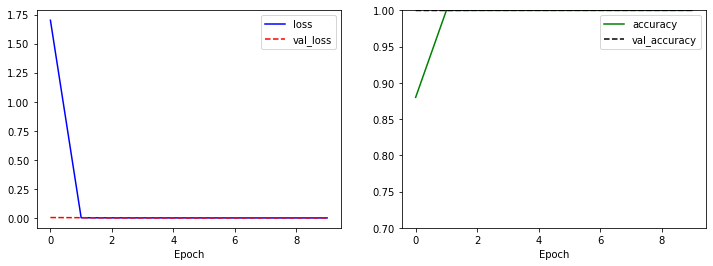

In [15]:
# %%
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)


import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')

plt.xlabel('Epoch')
plt.legend() 

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend() 

plt.show()
